In [1]:
import numpy
import gzip
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
import warnings
import shutil
import xarray
from datetime import date
warnings.filterwarnings('ignore')
import pycountry
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua4 as eua
import numba
import copy
import glob
from numba import njit
import pandas
import glob
import psutil
import json
import requests

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def datetime_to_seconds(dates, ref='1900-01-01T00:00:00'):
    """ from datetime64 to seconds since 1900-01-01 00:00:00"""
    return ((dates - np.datetime64(ref)) / np.timedelta64(1, 's')).astype(np.int64)

def seconds_to_datetime(seconds, ref='1900-01-01'):
    """ from seconds to datetime64 """
    seconds = np.asarray(seconds)
    return pd.to_datetime(seconds, unit='s', origin=ref)

import matplotlib
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (20, 10)
font = {'family' : 'normal',
    # 'weight' : 'bold',
    'size'   : 22}
matplotlib.rc('font', **font)

In [2]:
with eua.CDMDataset('/users/staff/uvoggenberger/scratch/humtest/0-20001-0-11035_CEUAS_merged_v1.nc') as file:
    df = file.to_dataframe(groups=['observations_table', 'advanced_homogenisation', 'era5fb'], 
                           variables=['z_coordinate', 'observed_variable', 'observation_value', 'date_time', 'humidity_bias_estimate', 'dew_point_bias_estimate', 'fg_depar@body', 'an_depar@body', 'conversion_method'], 
                          )
    
display(df[df.observed_variable == 137][['date_time','z_coordinate','observation_value', 'humidity_bias_estimate']].dropna())
display(df[df.observed_variable == 138][['date_time','z_coordinate','observation_value', 'humidity_bias_estimate']].dropna())

,date_time,z_coordinate,observation_value,humidity_bias_estimate
64758940,1957-09-01 12:00:00,40000.0,235.399994,-0.990006
64758941,1957-09-01 12:00:00,50000.0,247.300003,2.670003
64758942,1957-09-01 12:00:00,70000.0,267.200012,-0.039988
64758943,1957-09-01 12:00:00,85000.0,275.200012,-0.969988
64758944,1957-09-01 12:00:00,99800.0,283.200012,-0.969988
...,...,...,...,...
76322289,2022-12-31 11:30:23,99440.0,276.320007,-0.059987
76322290,2022-12-31 11:30:23,99470.0,276.390015,-0.059987
76322291,2022-12-31 11:30:23,99530.0,276.440002,-0.059987
76322292,2022-12-31 11:30:23,99540.0,276.529999,-0.059987


,date_time,z_coordinate,observation_value,humidity_bias_estimate
76322294,1925-01-24 09:22:00,4300.0,0.280000,0.0
76322295,1925-01-24 09:22:00,4400.0,0.290000,0.0
76322296,1925-01-24 09:22:00,5300.0,0.280000,0.0
76322297,1925-01-24 09:22:00,9200.0,0.280000,0.0
76322298,1925-01-24 09:22:00,10300.0,0.290000,0.0
...,...,...,...,...
88035468,2022-12-31 11:30:23,99440.0,0.792027,-0.0
88035469,2022-12-31 11:30:23,99470.0,0.788326,-0.0
88035470,2022-12-31 11:30:23,99530.0,0.784618,-0.0
88035471,2022-12-31 11:30:23,99540.0,0.782605,-0.0


In [7]:
df[df.observed_variable == 138].drop_duplicates('conversion_method')

,z_coordinate,observed_variable,observation_value,date_time,conversion_method,humidity_bias_estimate,fg_depar@body,an_depar@body
76322294,4300.0,138,0.28,1925-01-24 09:22:00,-2147483648,0.0,NaN,NaN


In [8]:
df[df.observed_variable == 137].drop_duplicates('conversion_method')

,z_coordinate,observed_variable,observation_value,date_time,conversion_method,humidity_bias_estimate,fg_depar@body,an_depar@body
64758940,40000.0,137,235.399994,1957-09-01 12:00:00,-2147483648,-0.990006,NaN,NaN


In [16]:
df.drop_duplicates('conversion_method')

,z_coordinate,observed_variable,observation_value,date_time,conversion_method,humidity_bias_estimate,fg_depar@body,an_depar@body
0,NaN,0,98300.000000,1949-04-08 03:00:00,-2147483648,NaN,NaN,NaN
88035473,1961.329956,139,5.515433,1910-01-06 14:22:00,1,NaN,NaN,NaN


In [17]:
df[df.conversion_method == 1].drop_duplicates('observed_variable')

,z_coordinate,observed_variable,observation_value,date_time,conversion_method,humidity_bias_estimate,fg_depar@body,an_depar@body
88035473,1961.329956,139,5.515433,1910-01-06 14:22:00,1,NaN,NaN,NaN
101932183,1961.329956,140,-5.515433,1910-01-06 14:22:00,1,NaN,NaN,NaN


# only STD plevs:

In [2]:
sys.path.insert(0,os.getcwd()+'/../resort/rasotools-master/')
import rasotools
import xarray as xr

In [11]:
args = dict(frontend=None, backend='/mnt/users/scratch/leo/scratch/converted_v11/long/0-20001-0-11035_CEUAS_merged_v1.nc',
            outdir='/users/staff/uvoggenberger/scratch/humtest/0-20001-0-11035_CEUAS_merged_v1.nc',
            dates=None, plevs=None, #[  1000,   2000,   3000,   5000,   7000,  10000,  15000,  20000, 25000,  30000,  40000,  50000,  70000,  85000,  92500, 100000],
            temperature=False, humidity=True, winds=False, dewpoint=False, 
            feedback='humidity_bias_estimate', feedback_group='advanced_homogenisation', homogenisation='advanced_homogenisation',
            interpolate_missing=False, copypart=False, debug=False, verbose=True, logfile='adjustments.log'
           )

In [12]:
args

{'frontend': None,
 'backend': '/mnt/users/scratch/leo/scratch/converted_v11/long/0-20001-0-11035_CEUAS_merged_v1.nc',
 'outdir': '/users/staff/uvoggenberger/scratch/humtest/0-20001-0-11035_CEUAS_merged_v1.nc',
 'dates': None,
 'plevs': None,
 'temperature': False,
 'humidity': True,
 'winds': False,
 'dewpoint': False,
 'feedback': 'humidity_bias_estimate',
 'feedback_group': 'advanced_homogenisation',
 'homogenisation': 'advanced_homogenisation',
 'interpolate_missing': False,
 'copypart': False,
 'debug': False,
 'verbose': True,
 'logfile': 'adjustments.log'}

In [42]:
with eua.CDMDataset('/users/staff/uvoggenberger/scratch/humtest/0-20001-0-11035_CEUAS_merged_v1.nc') as file:
    rh = file.read_data_to_cube('relative_humidity',
                                    dates=args['dates'],
                                    plevs=args['plevs'],
                                    feedback=args['feedback'],
                                    feedback_group=args['feedback_group'],
                                   )
    dp = file.read_data_to_cube('dew_point_temperature',
                                    dates=args['dates'],
                                    plevs=args['plevs'],
                                    feedback=None,
                                    feedback_group=None,
                                   )
    ta = file.read_data_to_cube('air_temperature',
                                    dates=args['dates'],
                                    plevs=args['plevs'],
                                    feedback=None,
                                    feedback_group=None,
                                   )
    
comb = xr.combine_by_coords([ta['air_temperature'], dp['dew_point_temperature']])
comb = xr.combine_by_coords([comb, rh['relative_humidity']])
comb = xr.combine_by_coords([comb, rh['relative_humidity_humidity_bias_estimate'].rename('relative_humidity_humidity_bias_estimate')])
comb

dates None
dates None
dates None
dates None


<xarray.Dataset>
Dimensions:                                   (time: 53779, plev: 16)
Coordinates:
  * time                                      (time) datetime64[ns] 1925-01-2...
  * plev                                      (plev) int64 1000 2000 ... 100000
Data variables:
    air_temperature                           (time, plev) float32 nan ... nan
    dew_point_temperature                     (time, plev) float32 nan ... nan
    relative_humidity                         (time, plev) float32 nan ... nan
    relative_humidity_humidity_bias_estimate  (time, plev) float32 nan ... nan

In [45]:
comb['dew_point_temperature_adjusted'] = rasotools.met.convert.to_dpd(temp=comb['air_temperature'], press=comb['plev'], rel_humi=comb['relative_humidity']-comb['relative_humidity_humidity_bias_estimate'], svp_method='Sonntag', dp_instead_of_dpd=True)
comb['dew_point_temperature_humidity_bias_estimate'] = comb['dew_point_temperature'] - comb['dew_point_temperature_adjusted']
comb

<xarray.Dataset>
Dimensions:                                       (time: 53779, plev: 16)
Coordinates:
  * time                                          (time) datetime64[ns] 1925-...
  * plev                                          (plev) int64 1000 ... 100000
Data variables:
    air_temperature                               (time, plev) float32 nan .....
    dew_point_temperature                         (time, plev) float32 nan .....
    relative_humidity                             (time, plev) float32 nan .....
    relative_humidity_humidity_bias_estimate      (time, plev) float32 nan .....
    dew_point_temperature_adjusted                (time, plev) float64 nan .....
    dew_point_temperature_humidity_bias_estimate  (time, plev) float64 nan .....

In [44]:
df = comb.to_dataframe().reset_index()
df

,time,plev,air_temperature,dew_point_temperature,relative_humidity,relative_humidity_humidity_bias_estimate,dew_point_temperature_adjusted,dew_point_temperature_humidity_bias_estimate
0,1925-01-24 09:22:00,1000,NaN,NaN,NaN,NaN,NaN,NaN
1,1925-01-24 09:22:00,2000,NaN,NaN,NaN,NaN,NaN,NaN
2,1925-01-24 09:22:00,3000,NaN,NaN,NaN,NaN,NaN,NaN
3,1925-01-24 09:22:00,5000,NaN,NaN,NaN,NaN,NaN,NaN
4,1925-01-24 09:22:00,7000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
860459,2022-12-31 11:30:23,50000,254.800003,253.279999,0.877875,0.0,253.30,-0.020001
860460,2022-12-31 11:30:23,70000,272.269989,265.329987,0.592786,0.0,265.37,-0.040013
860461,2022-12-31 11:30:23,85000,281.899994,277.220001,0.724276,0.0,277.28,-0.059999
860462,2022-12-31 11:30:23,92500,287.279999,278.670013,0.561280,0.0,278.73,-0.059987


In [36]:
import seaborn
import matplotlib.pylab as plt
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import cm

In [37]:
plevs = [1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]
color = cm.rainbow(np.linspace(0, 1, 16))
plev_color = {}
for i in range(len(plevs)):
    plev_color[plevs[i]] = color[i]

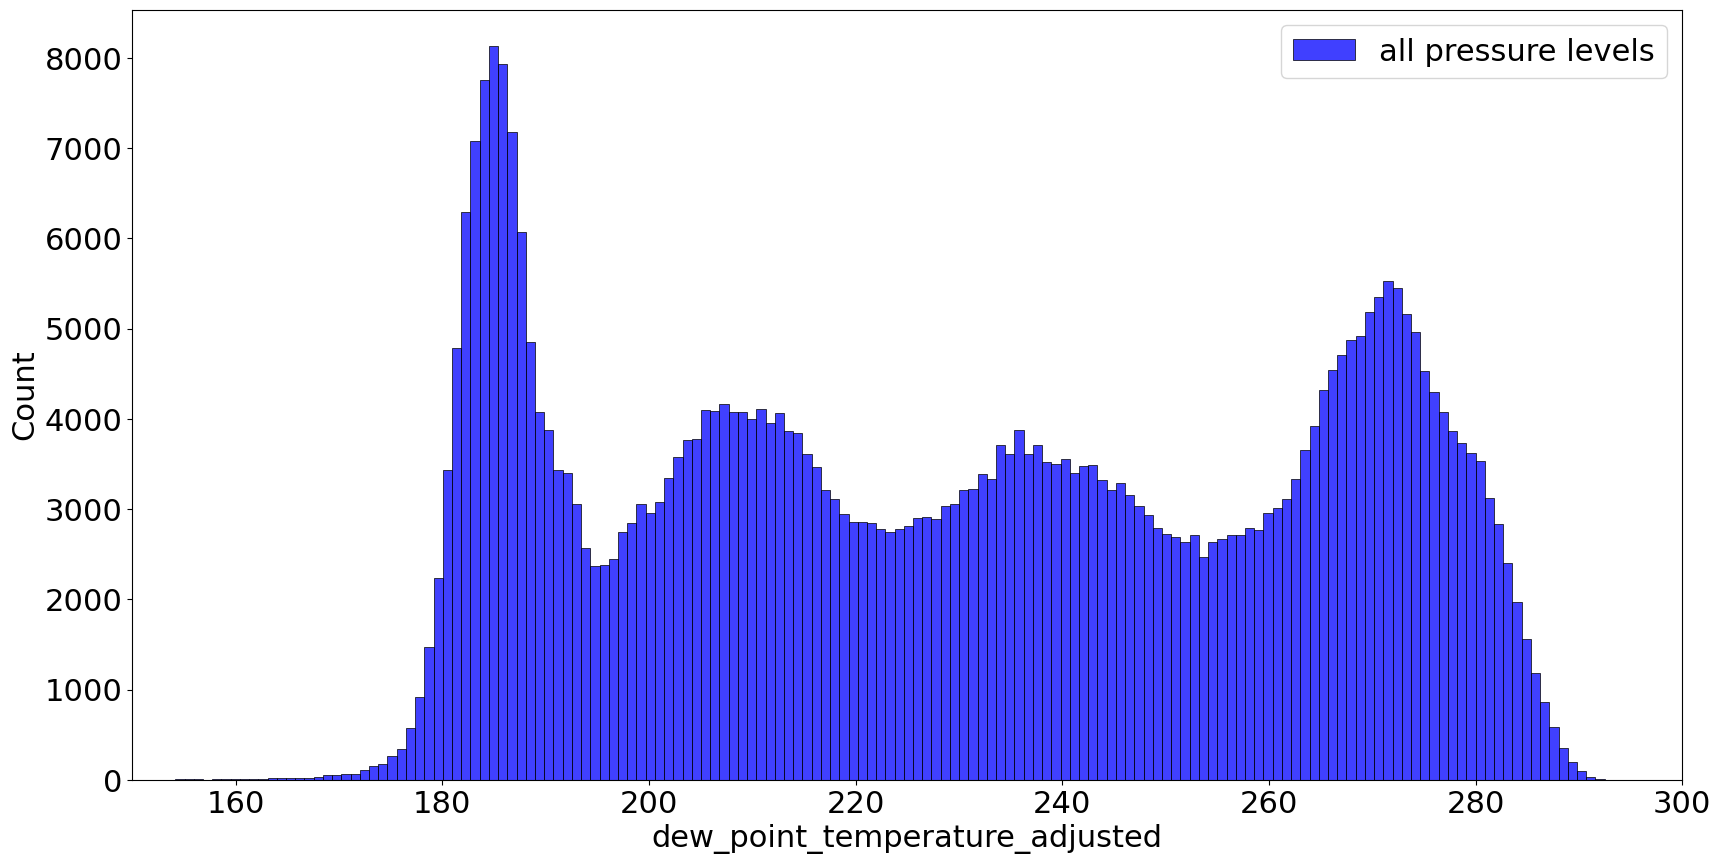

In [38]:
seaborn.histplot(data=df, x="dew_point_temperature_adjusted", label='all pressure levels', bins=200, color='blue', legend=False)
plt.xlim(150, 300)
plt.legend()
plt.show()
plt.close()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


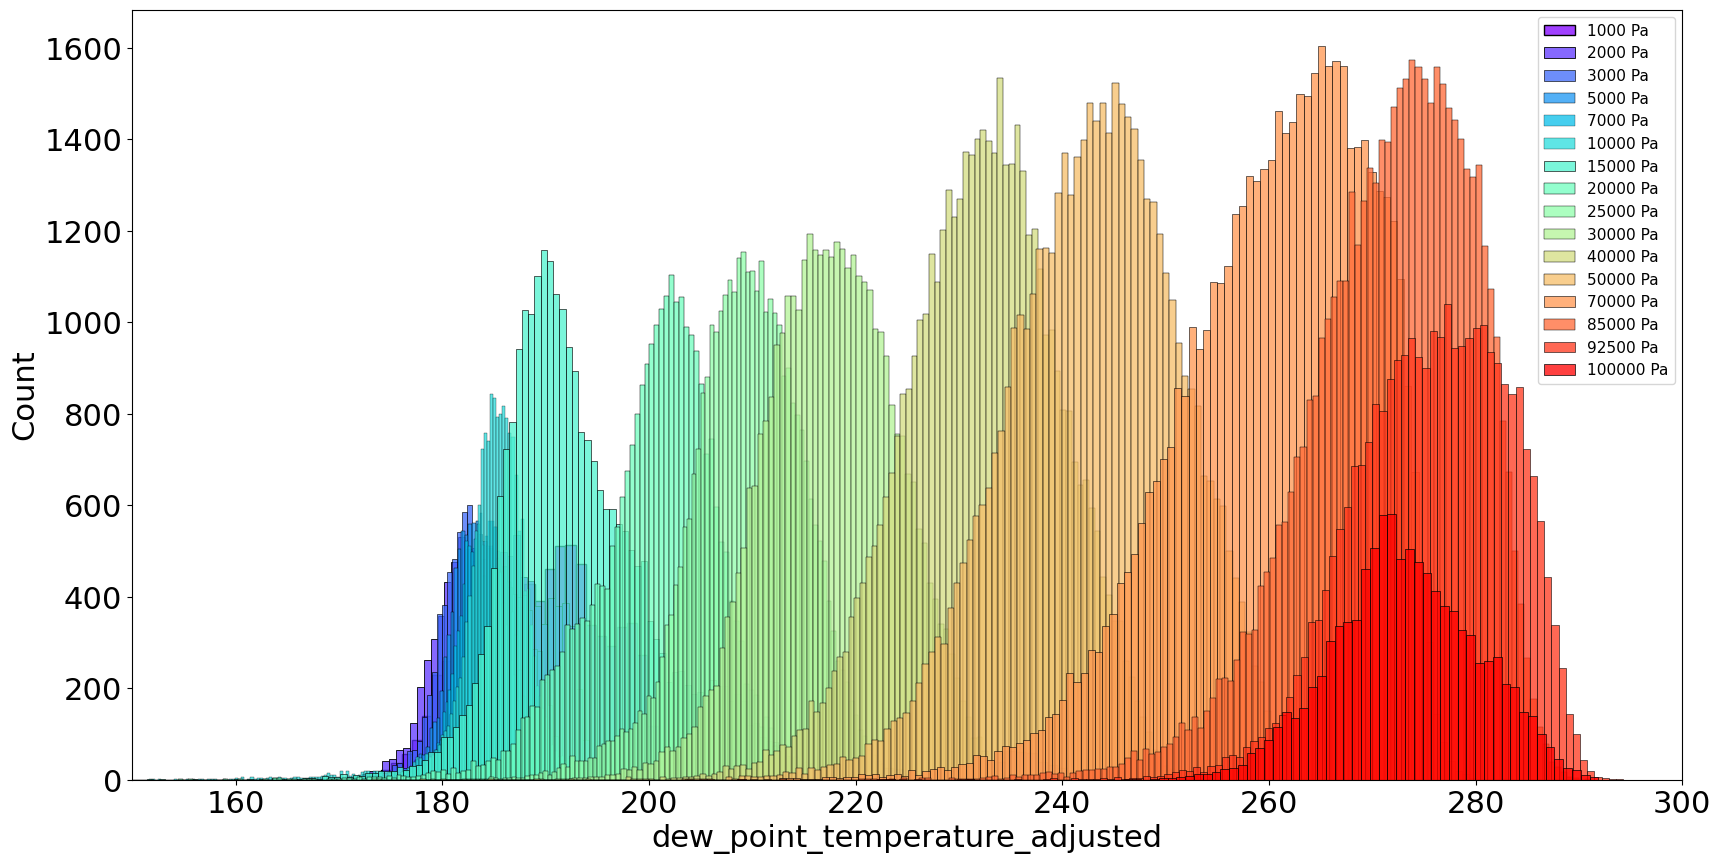

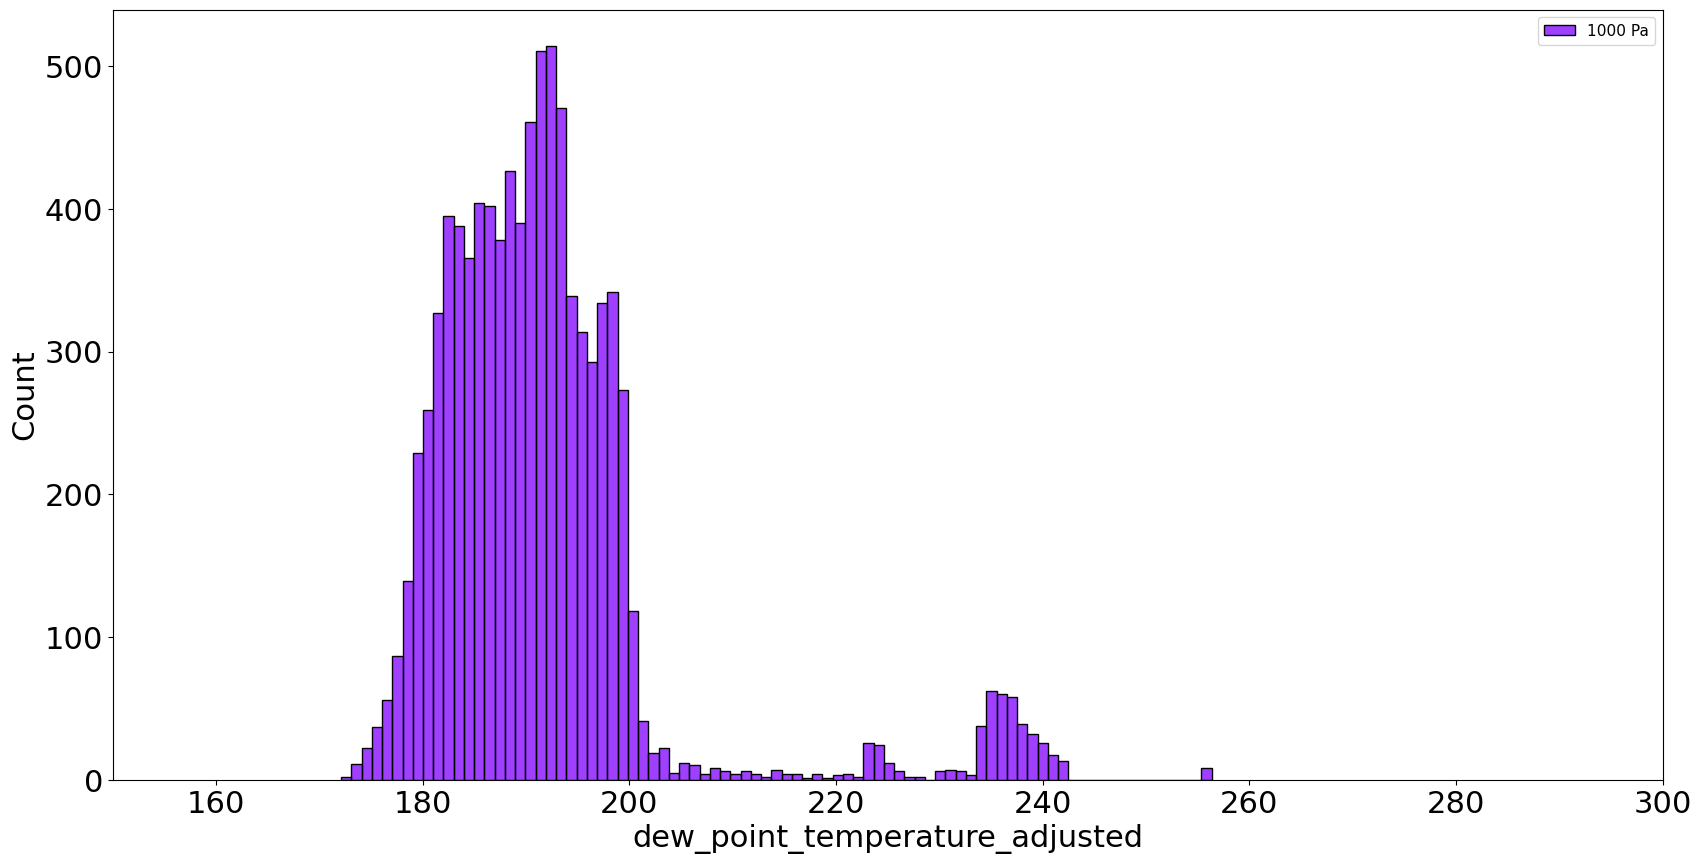

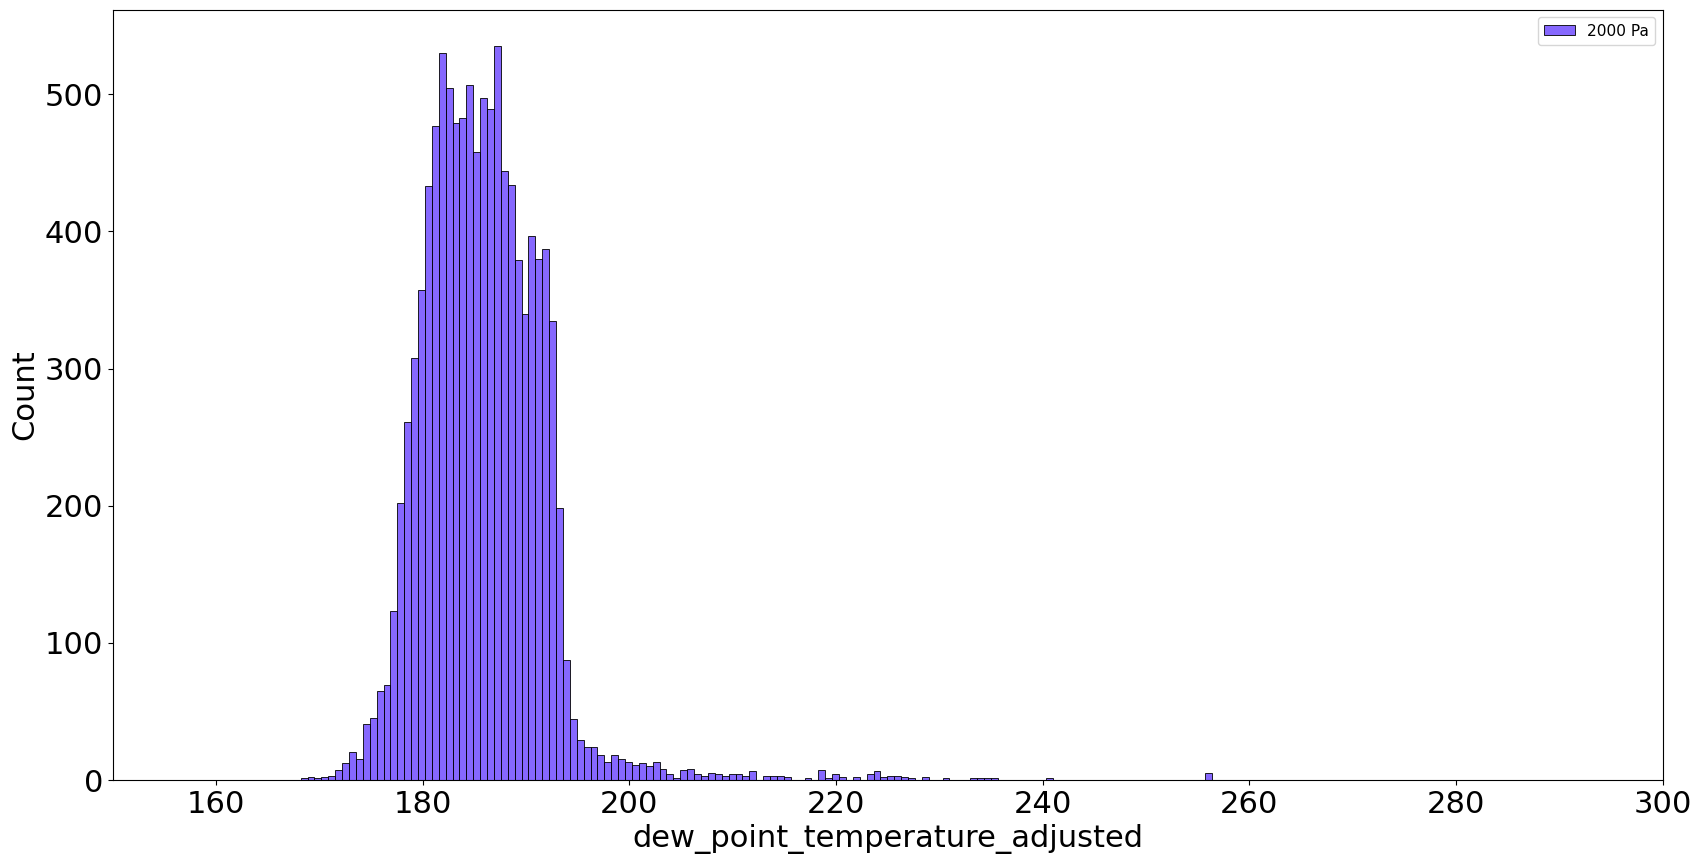

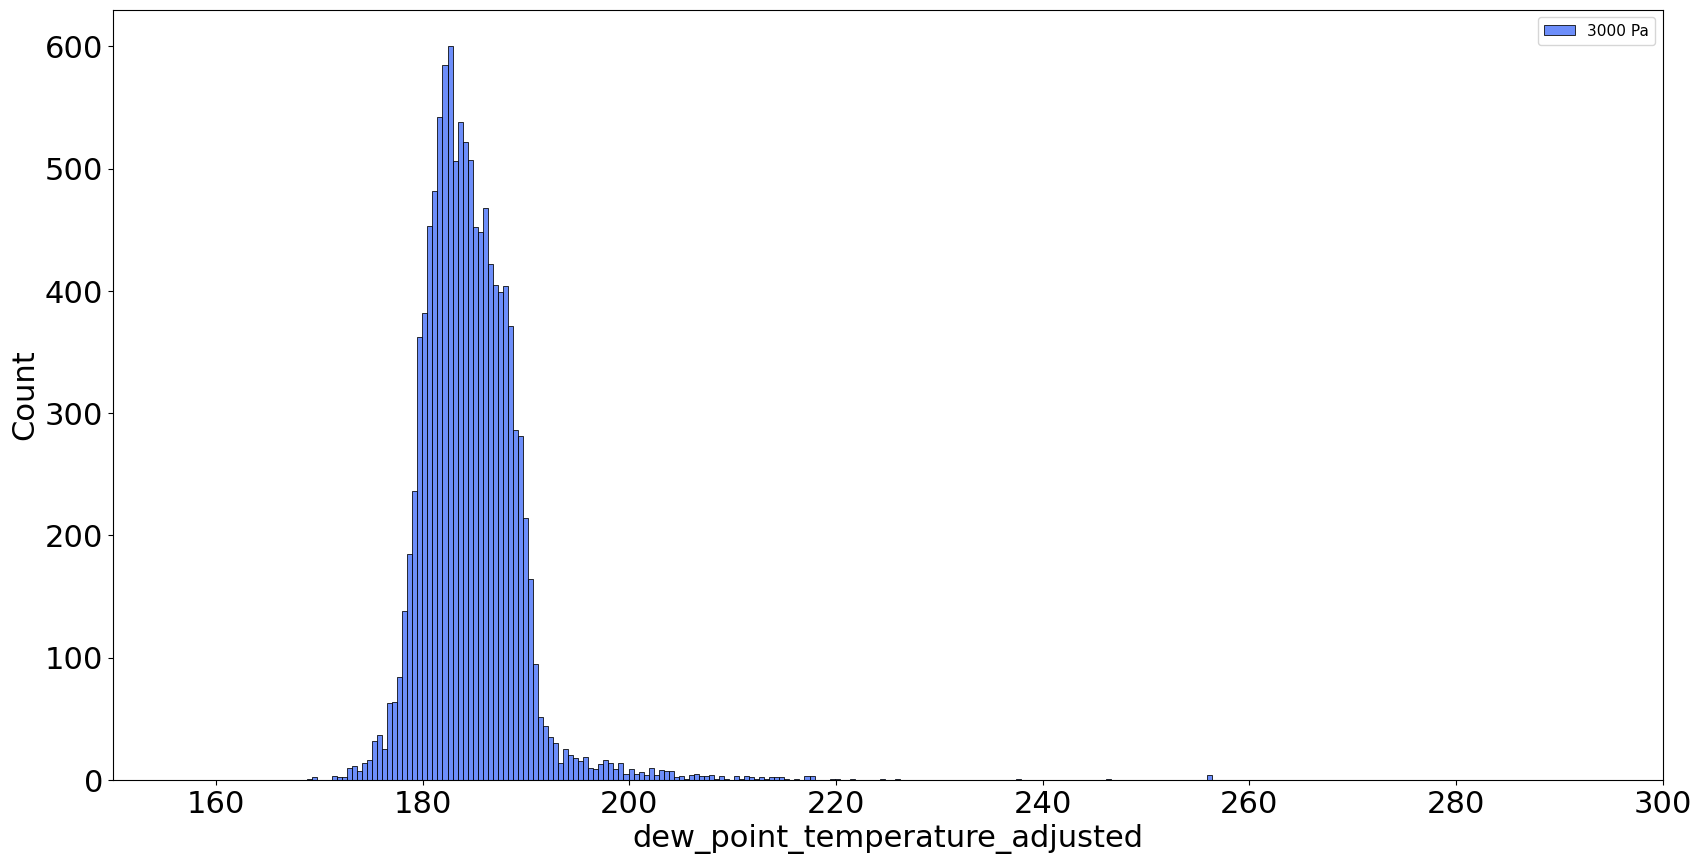

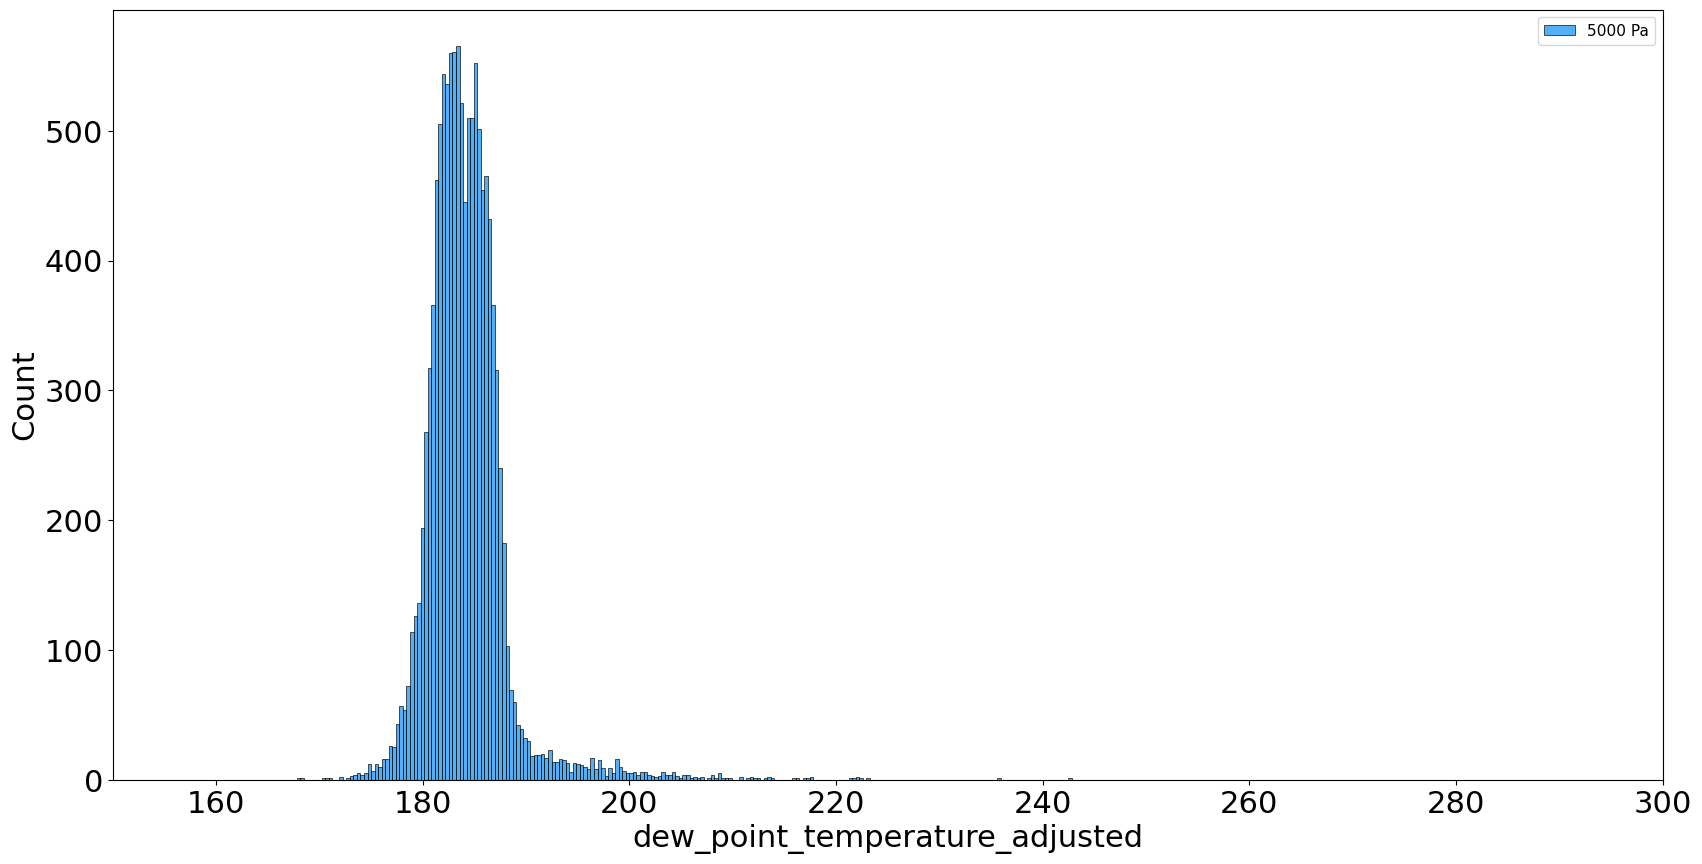

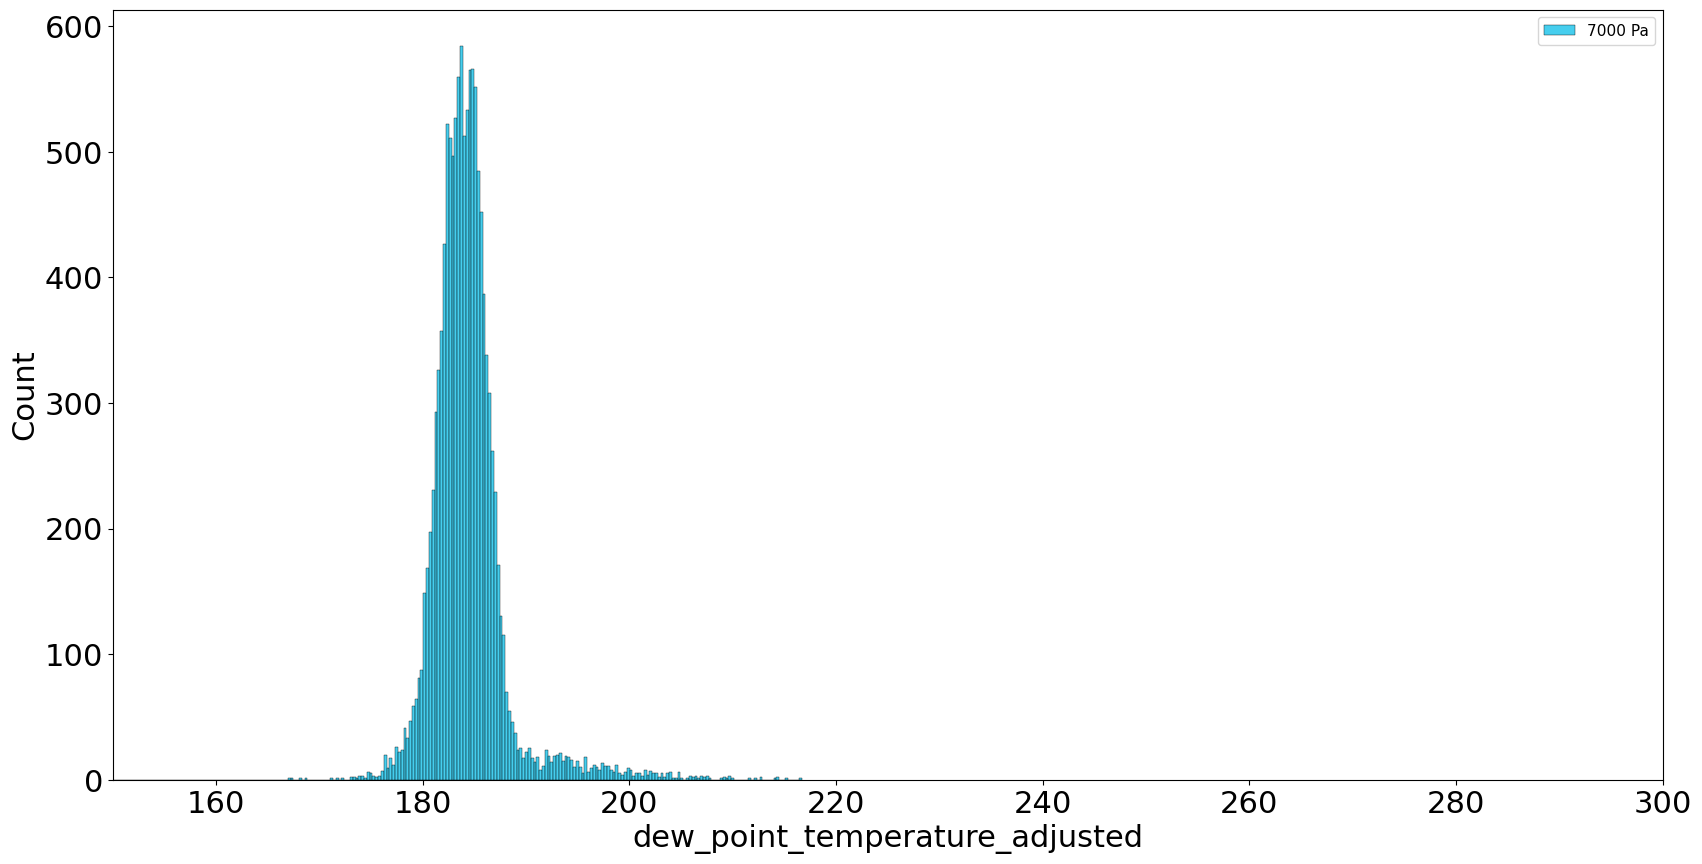

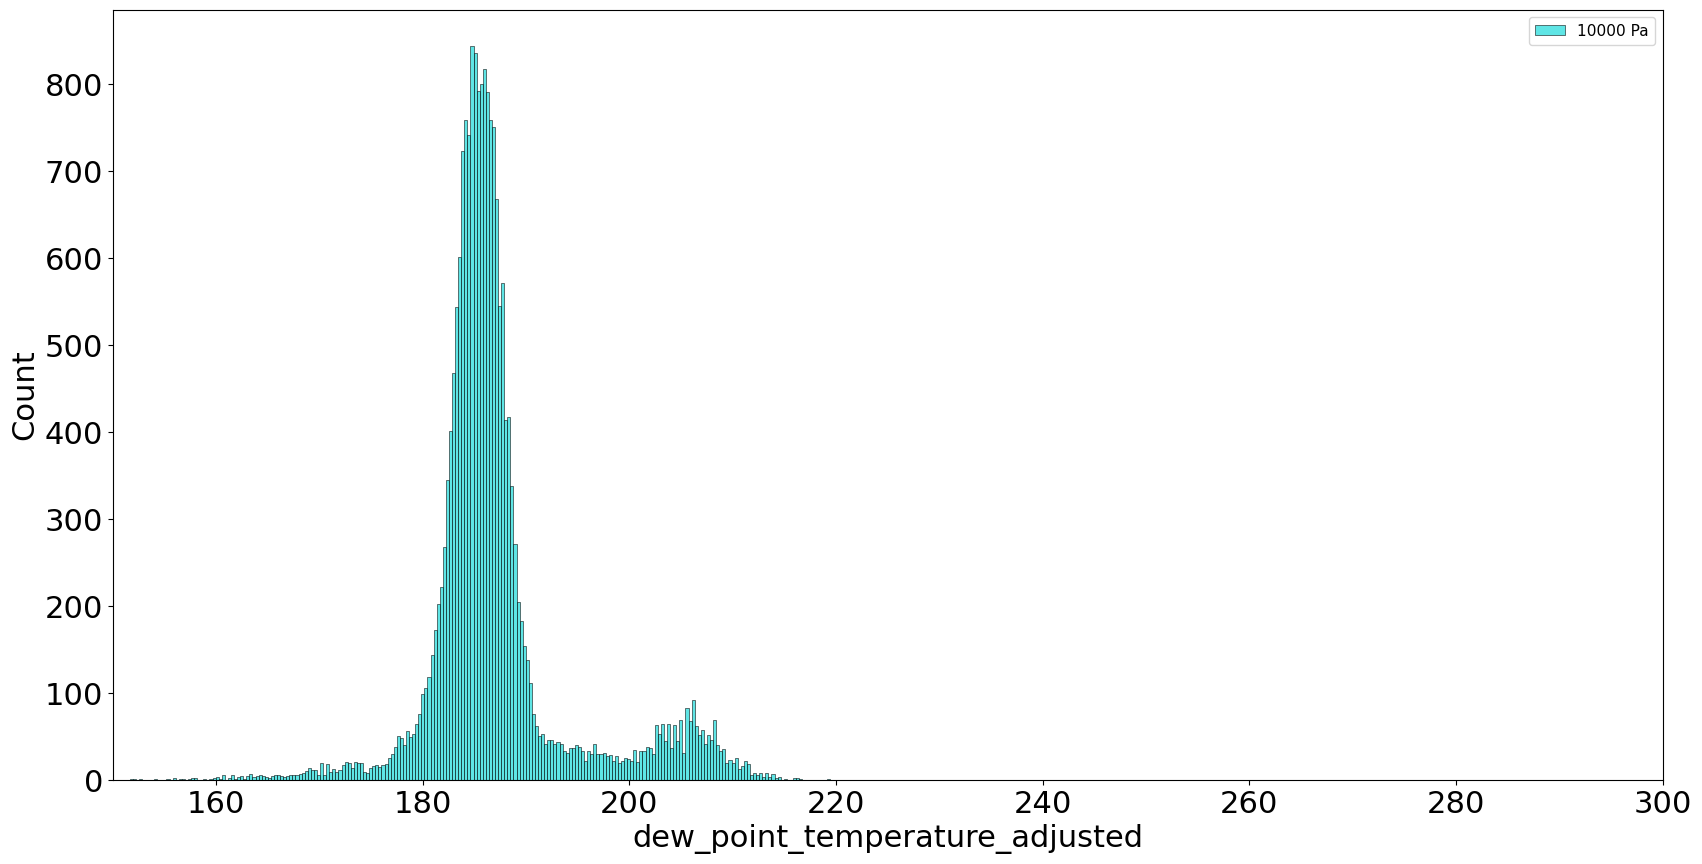

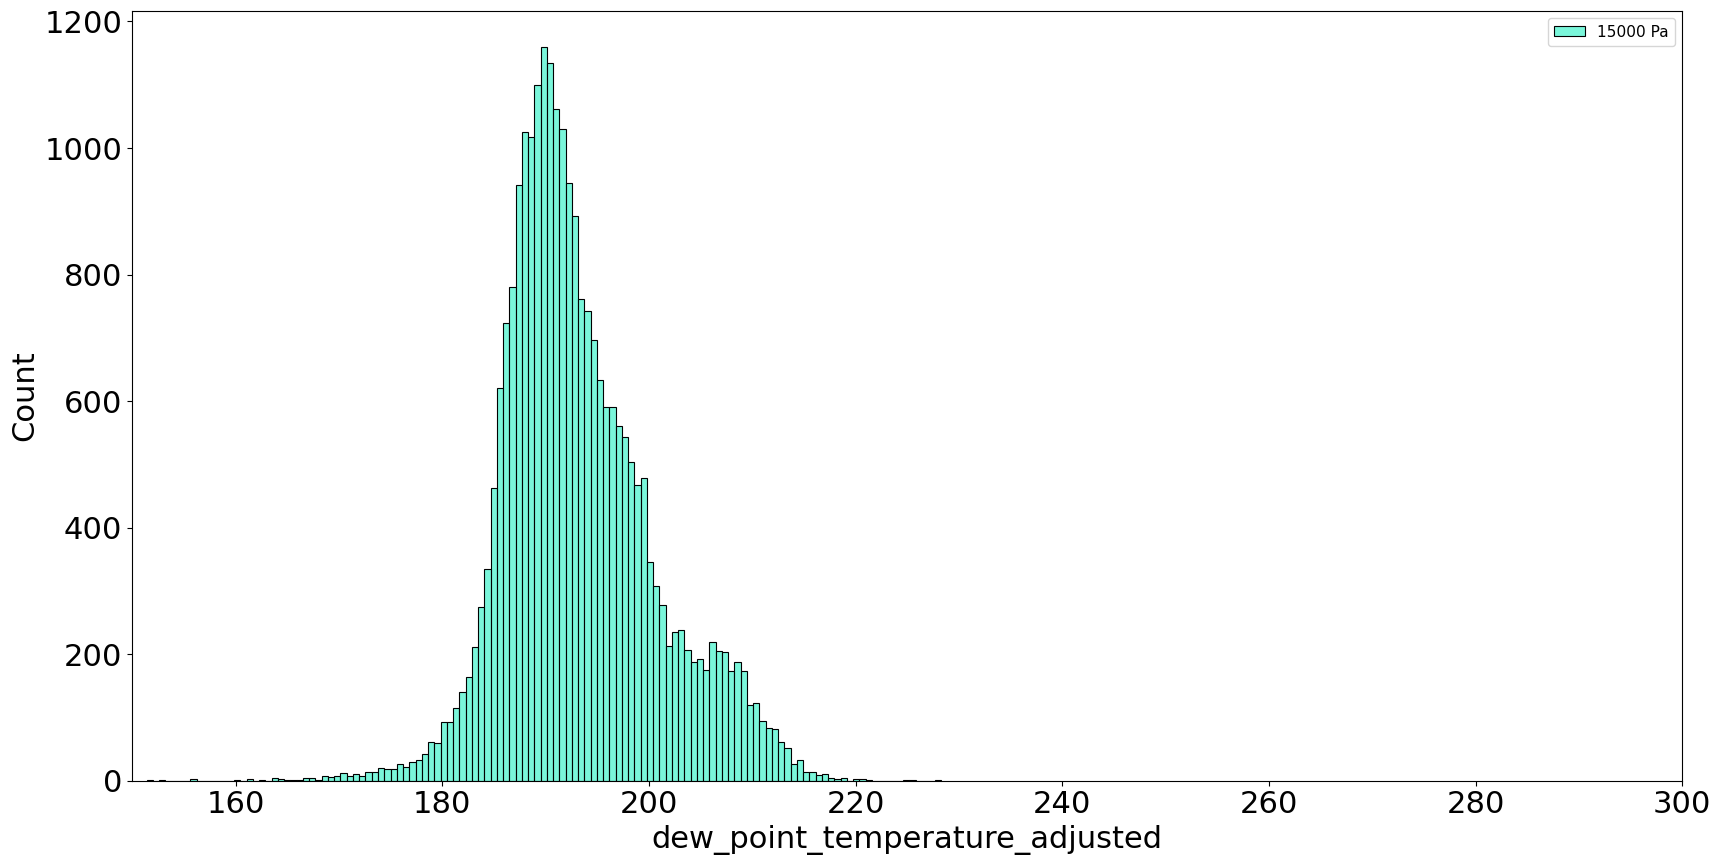

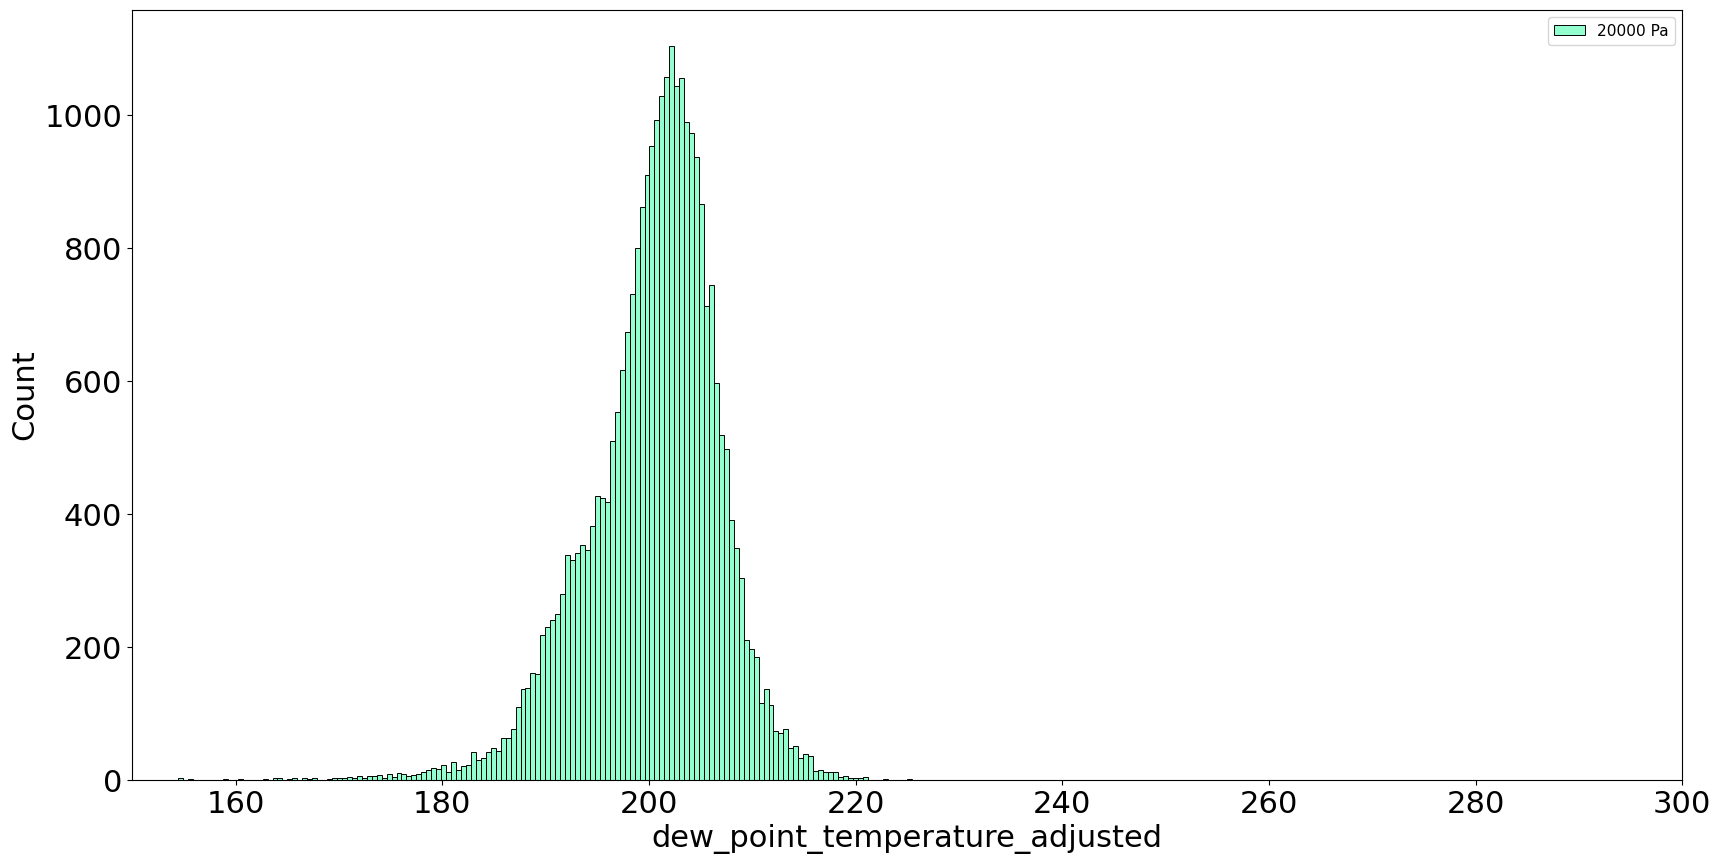

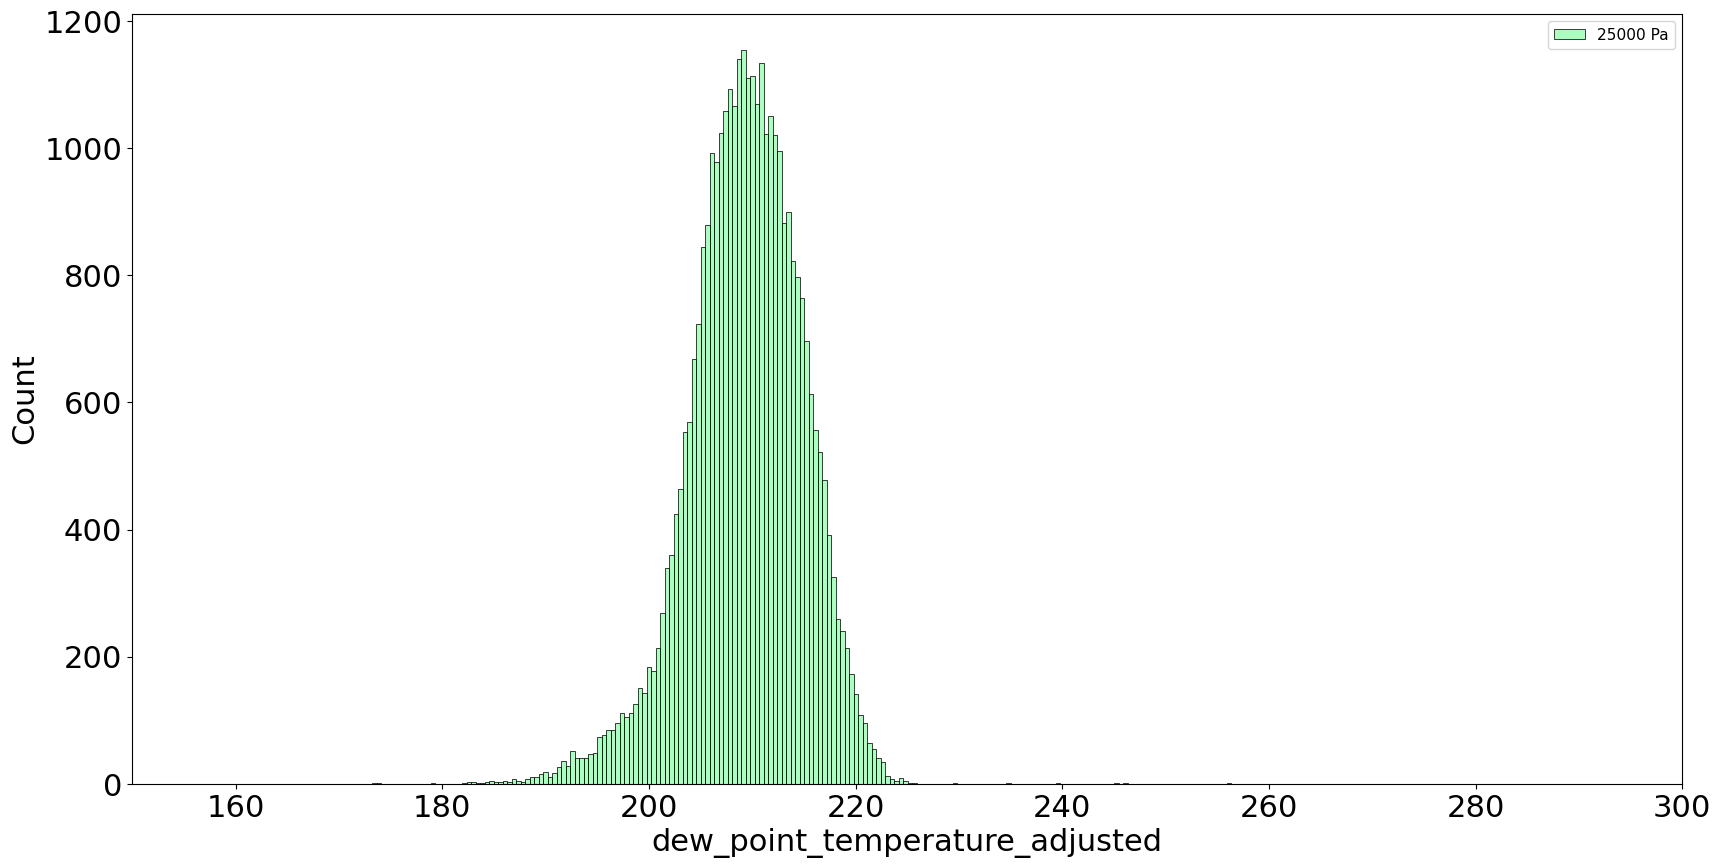

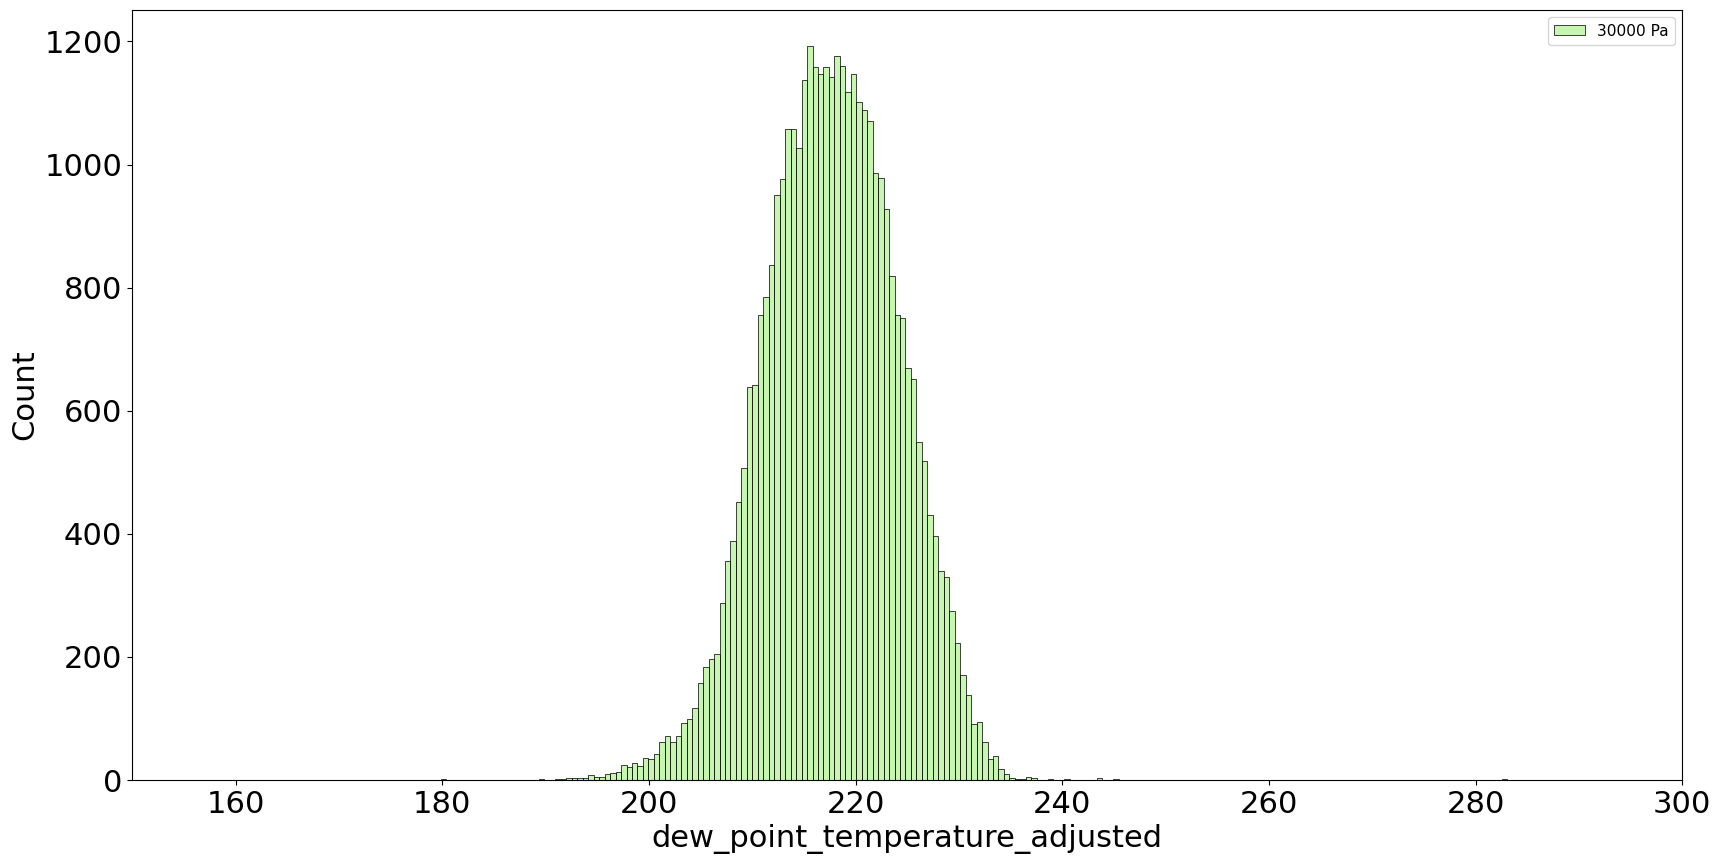

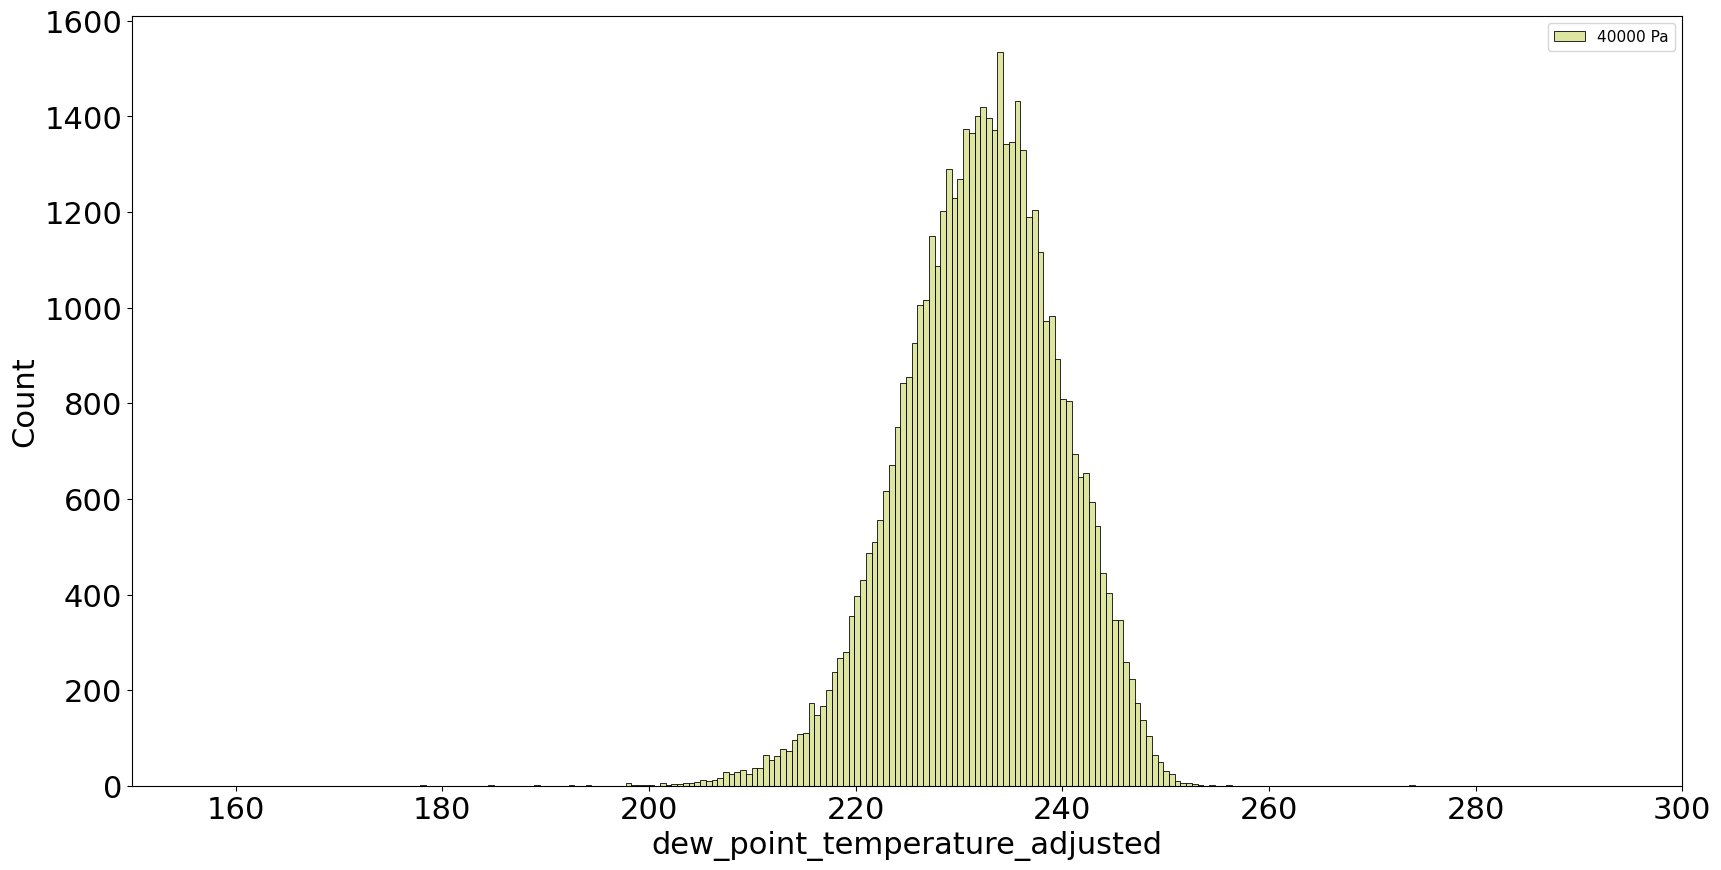

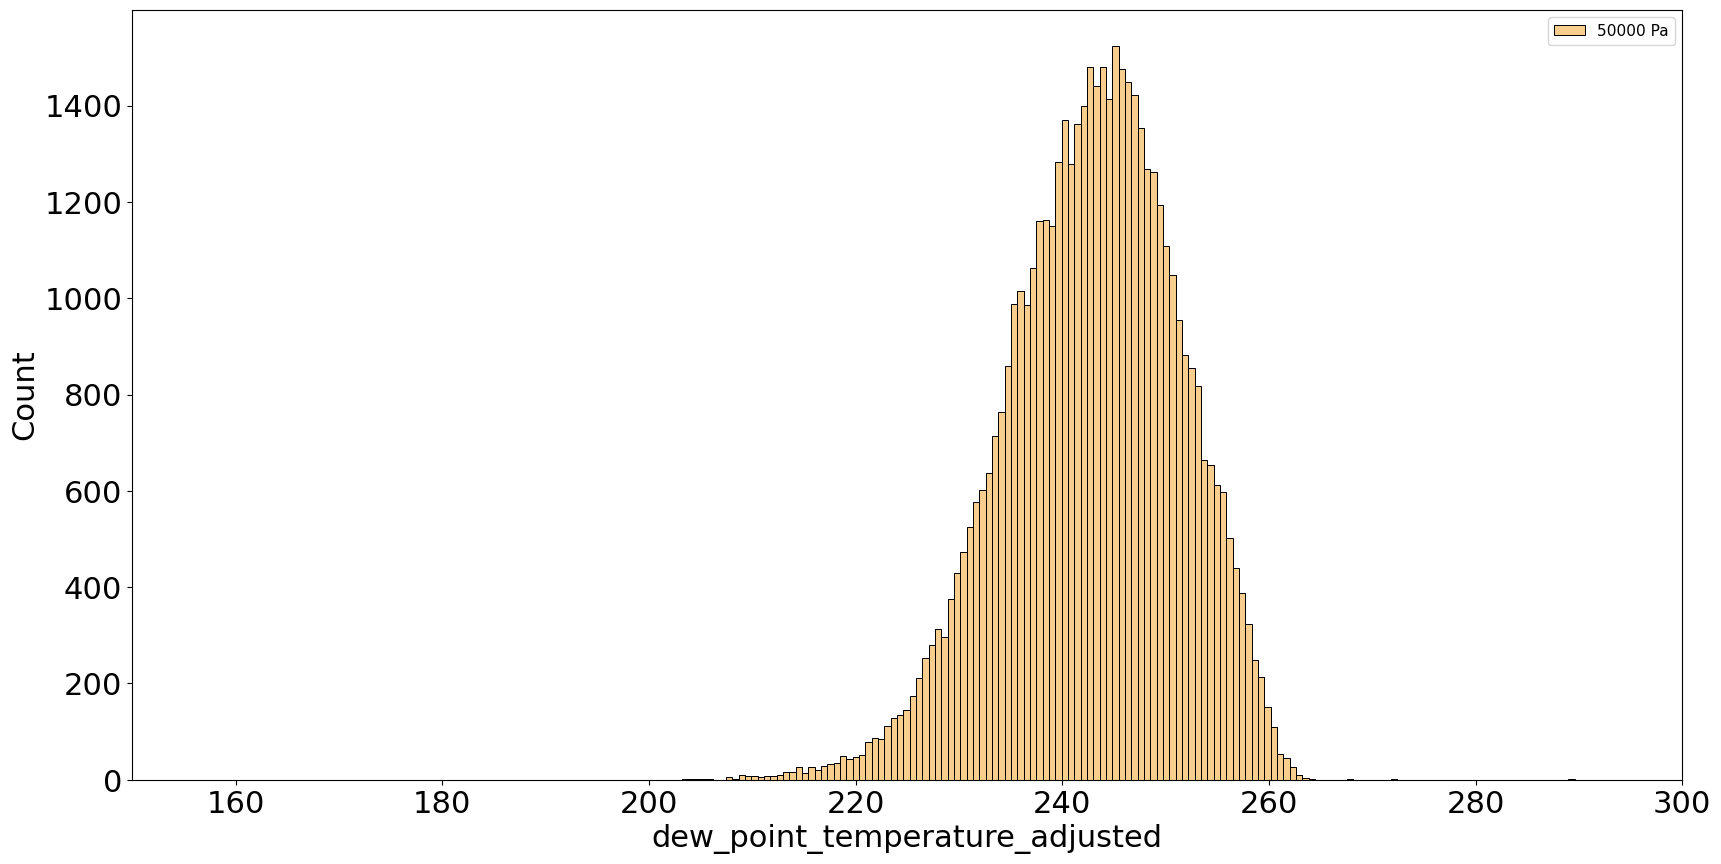

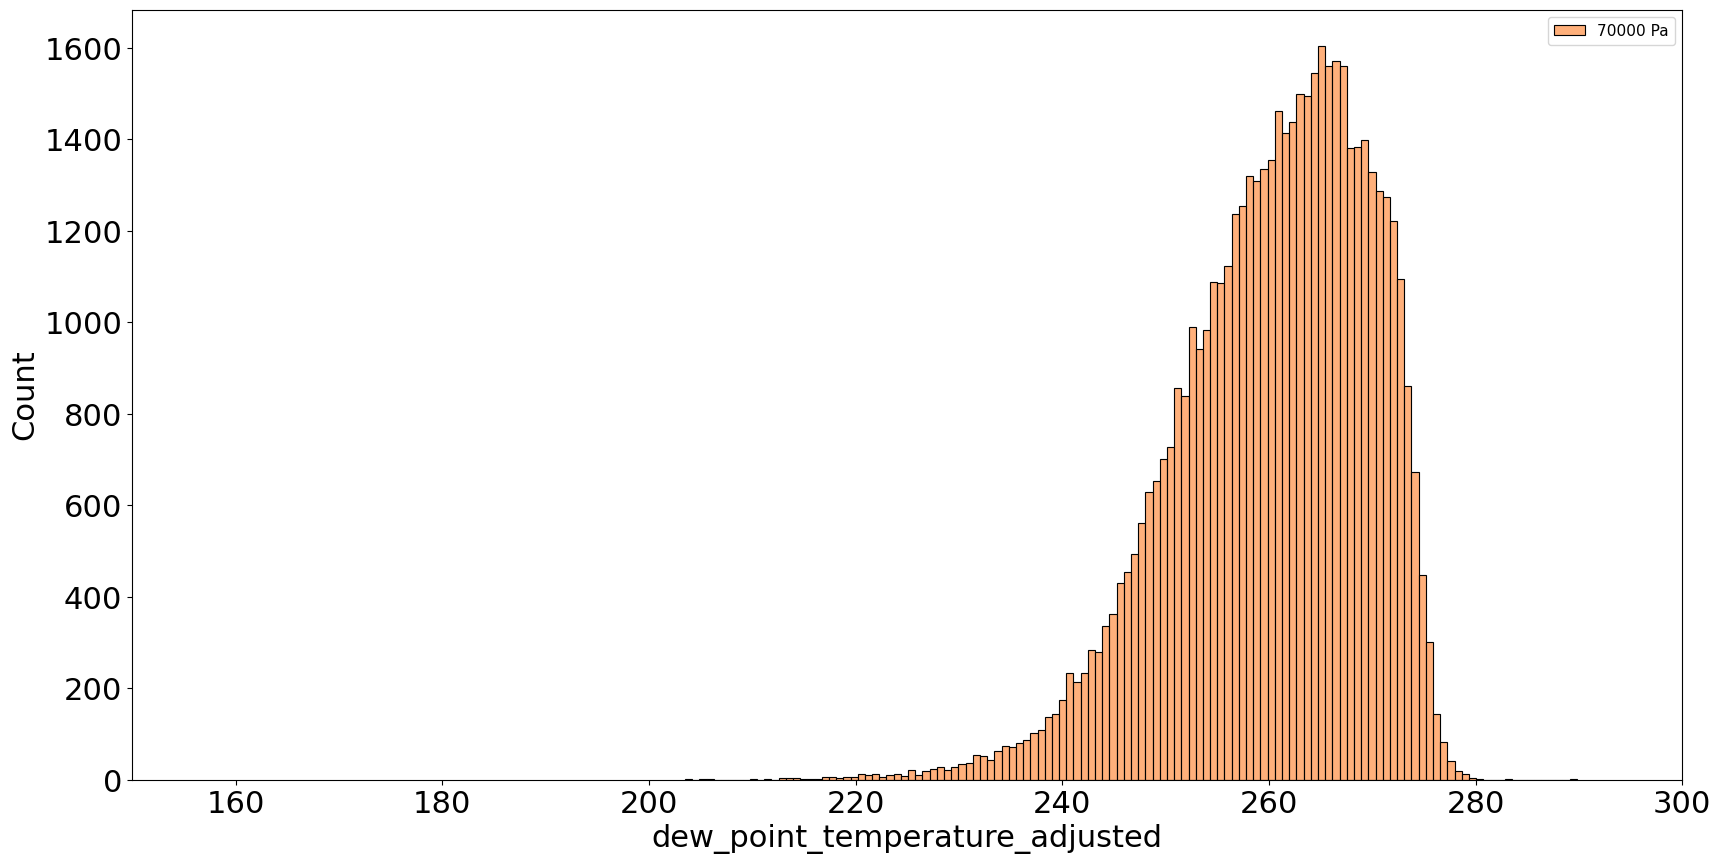

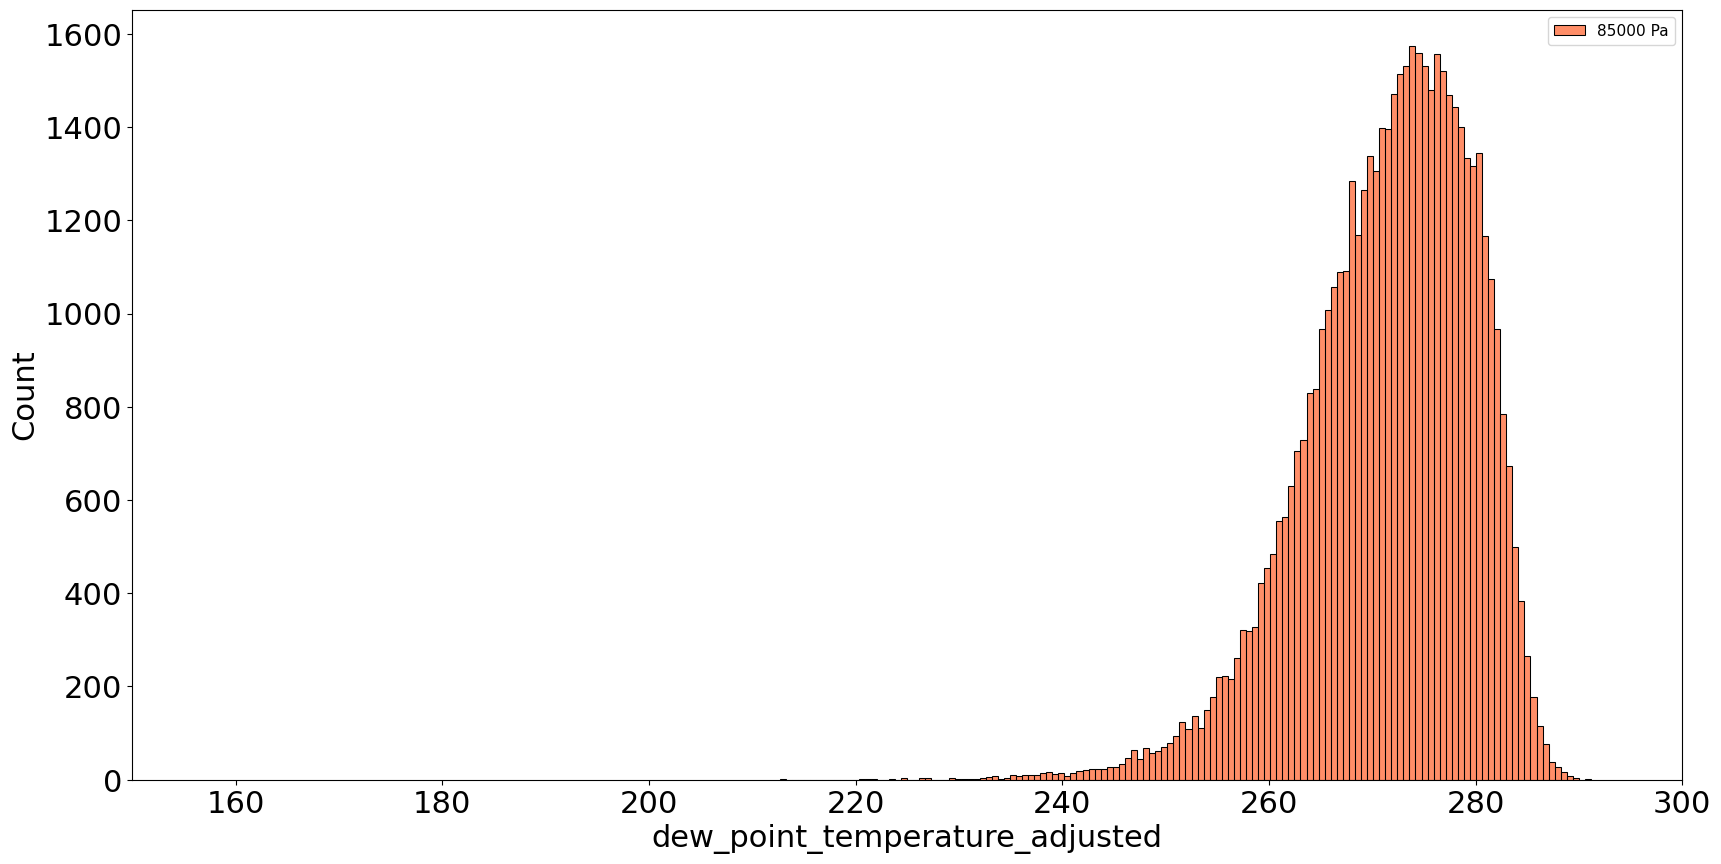

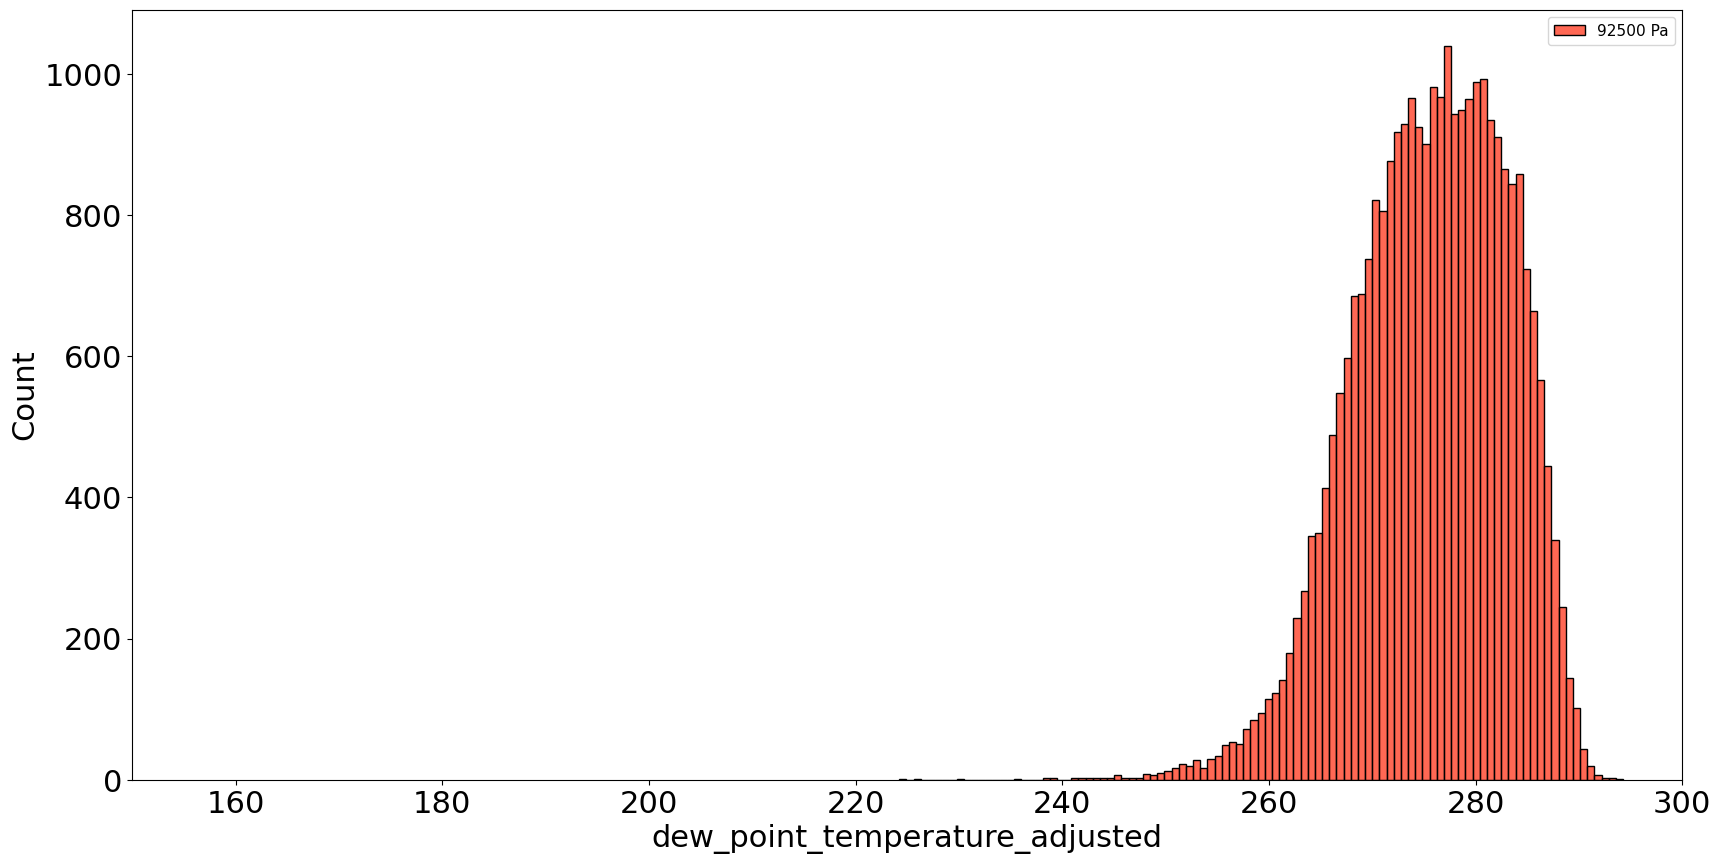

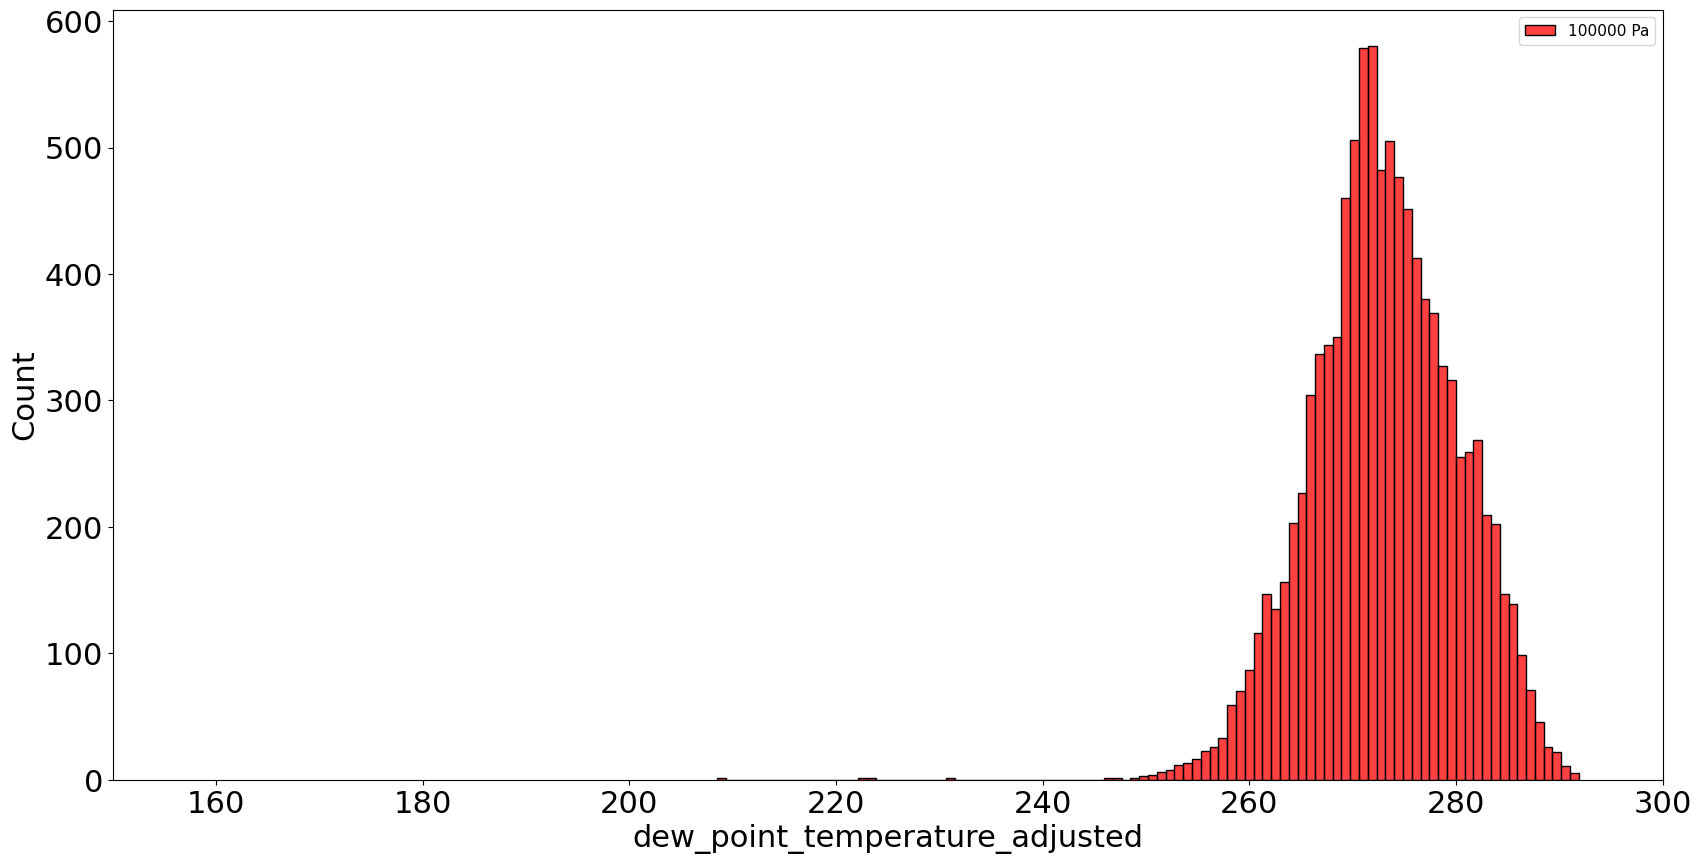

In [39]:
for i in plevs:
    seaborn.histplot(data=df[df.plev == i], x="dew_point_temperature_adjusted", color=plev_color[i], label = str(i) + ' Pa', legend=False)
font = font_manager.FontProperties(size=11)
plt.legend(prop=font)
plt.xlim(150, 300)
plt.show()
plt.close()

for i in plevs:
    seaborn.histplot(data=df[df.plev == i], x="dew_point_temperature_adjusted", color=plev_color[i], label = str(i) + ' Pa', legend=False)
    font = font_manager.FontProperties(size=11)
    plt.legend(prop=font)
    plt.xlim(150, 300)
    plt.show()
    plt.close()    

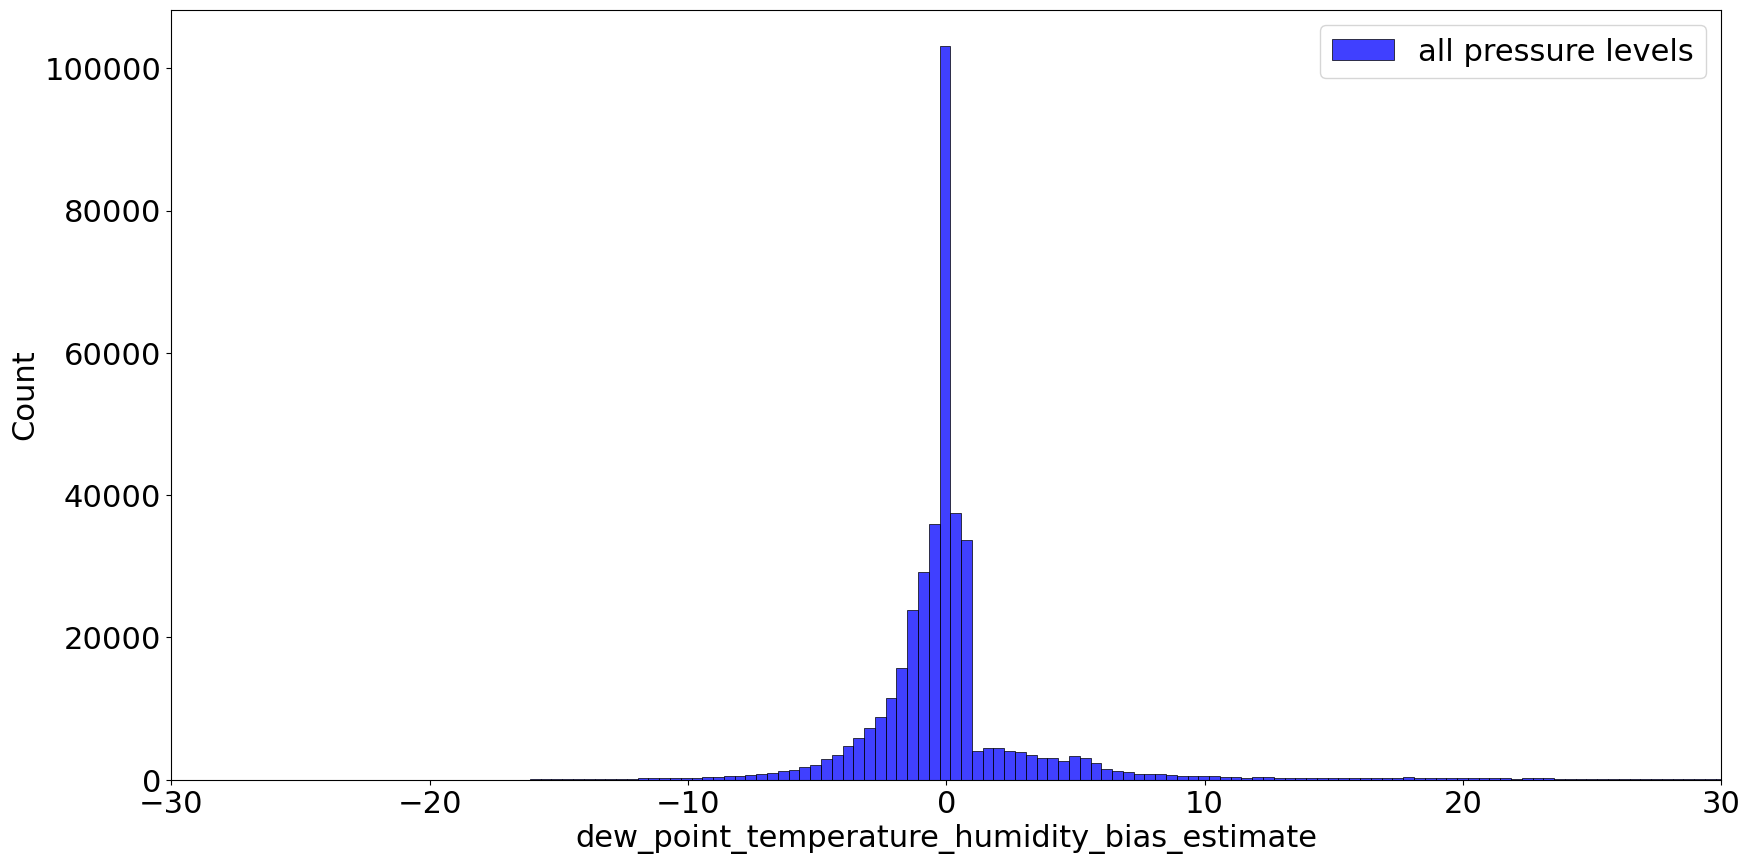

In [40]:
seaborn.histplot(data=df, x="dew_point_temperature_humidity_bias_estimate", color='blue', bins=200, label='all pressure levels', legend=False)
plt.xlim(-30, 30)
plt.legend()
plt.show()
plt.close()

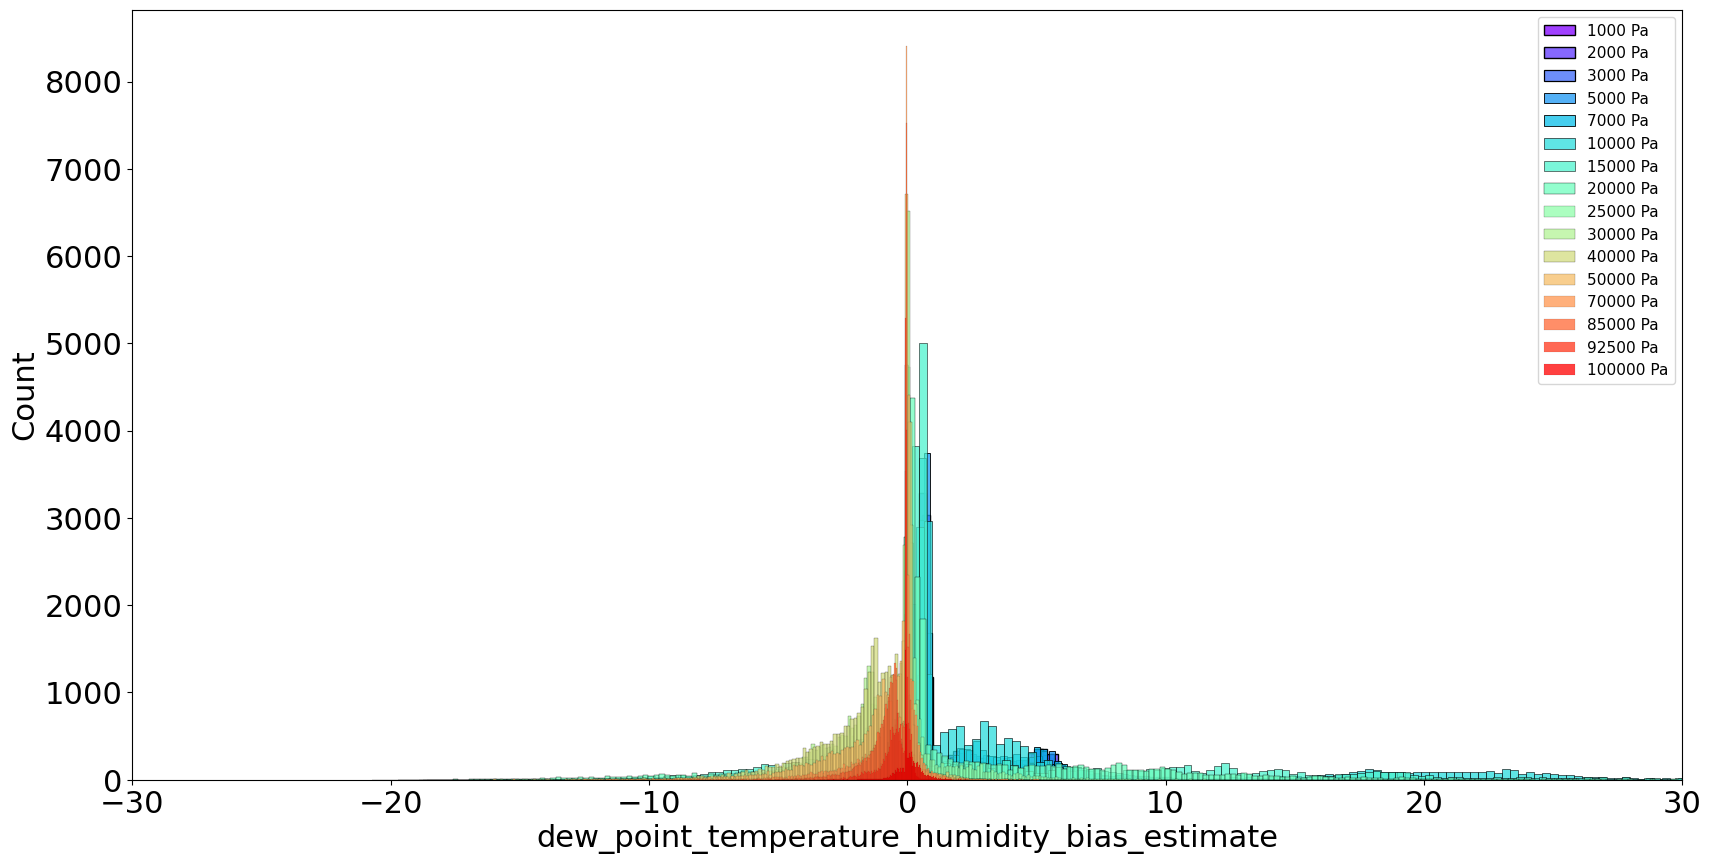

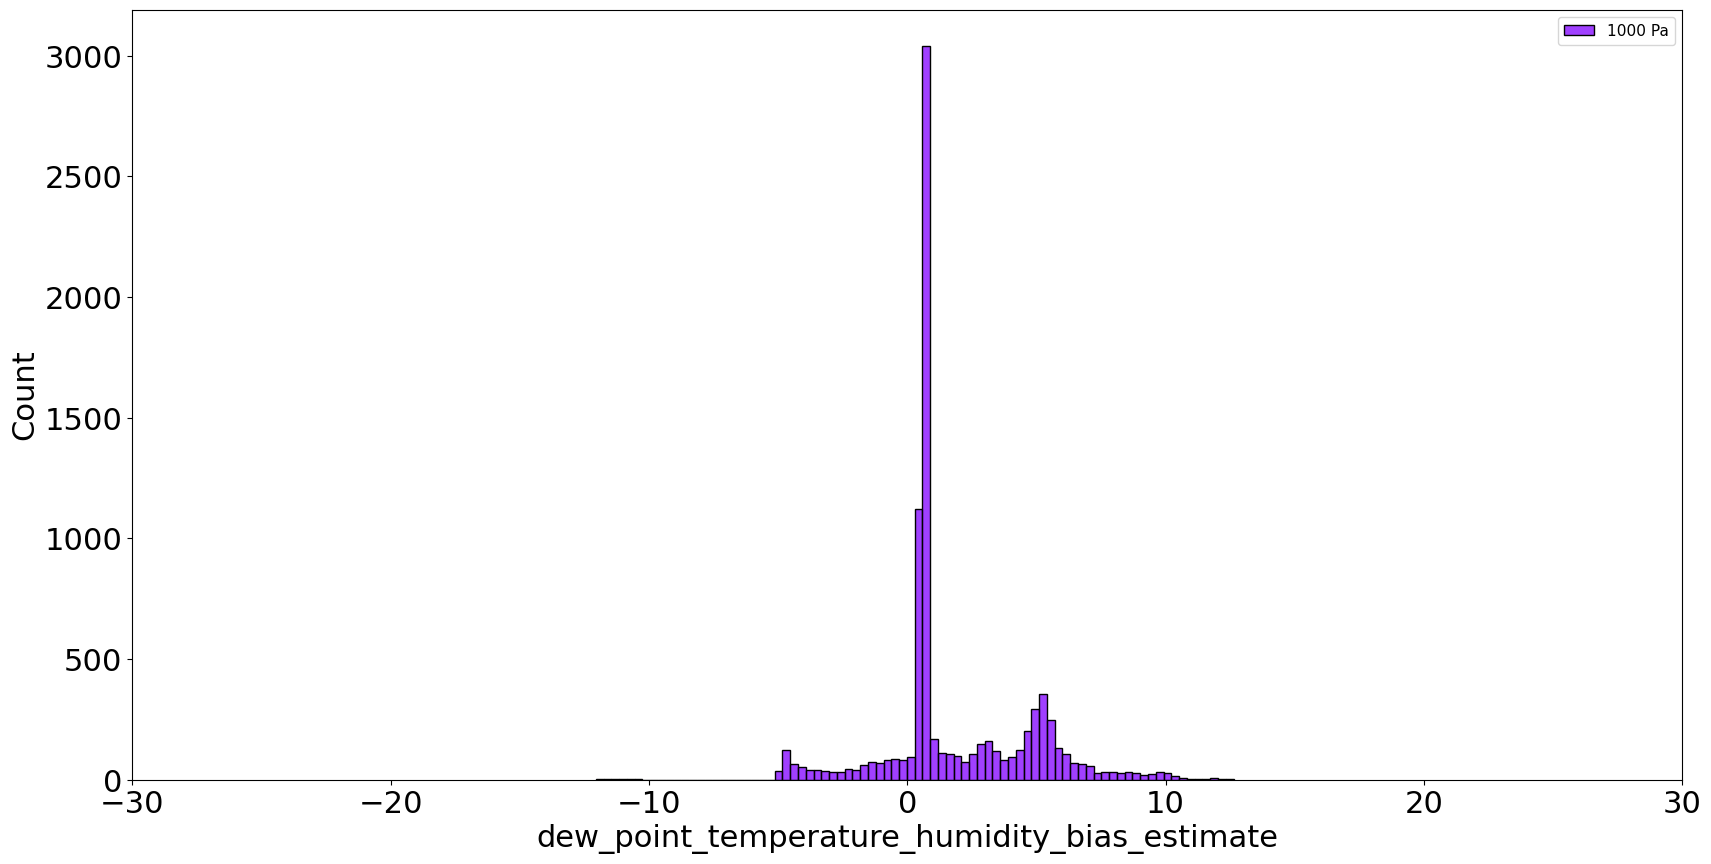

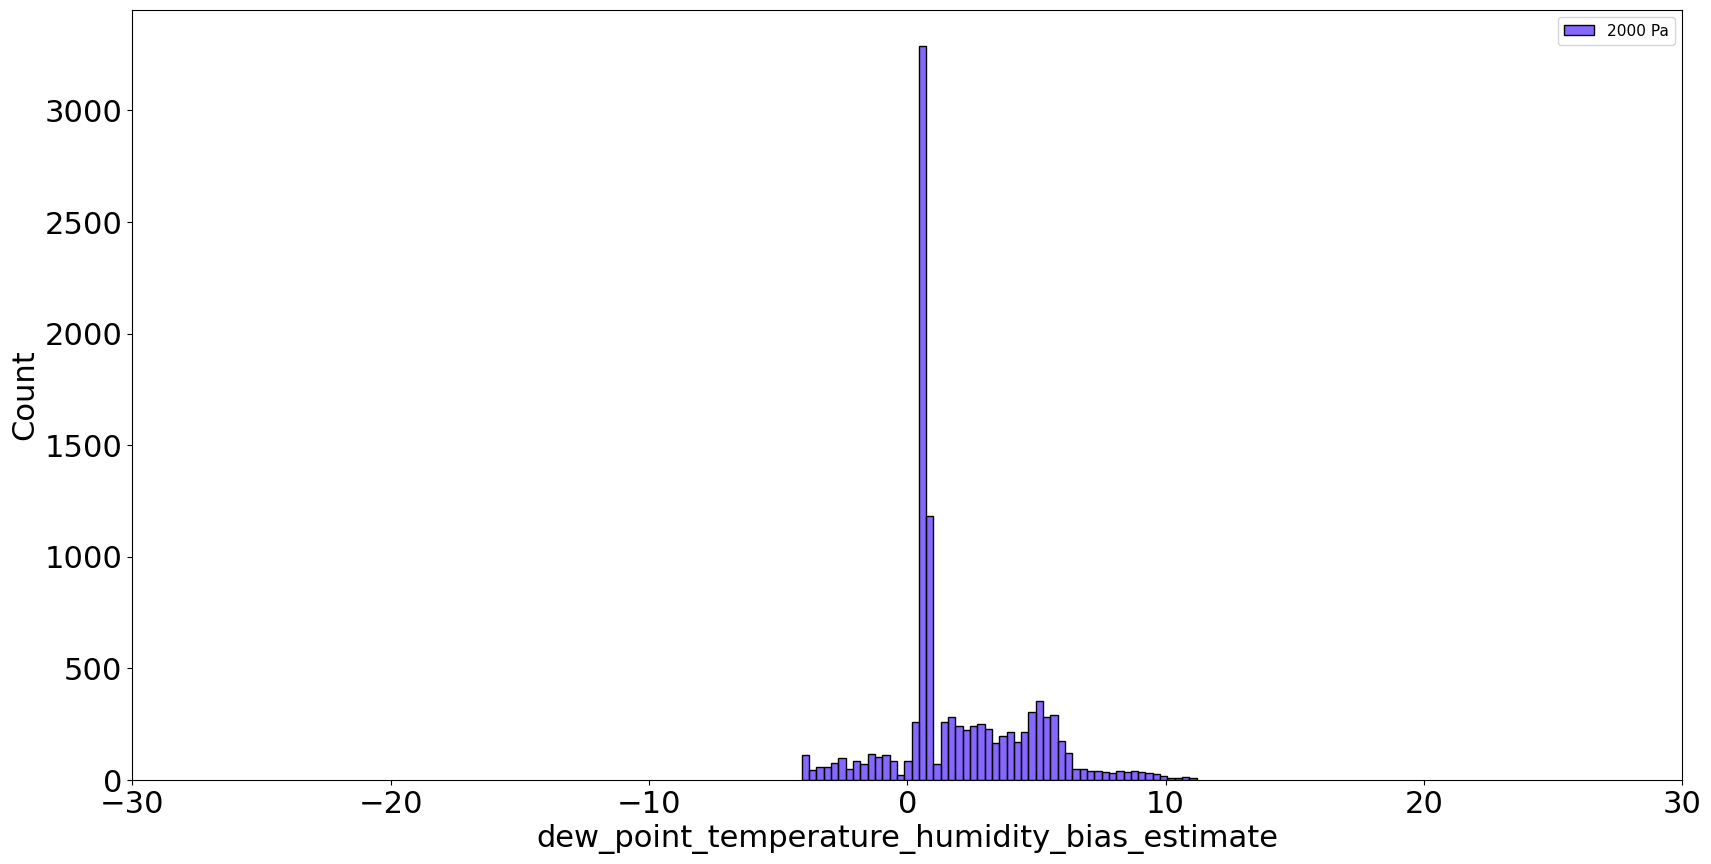

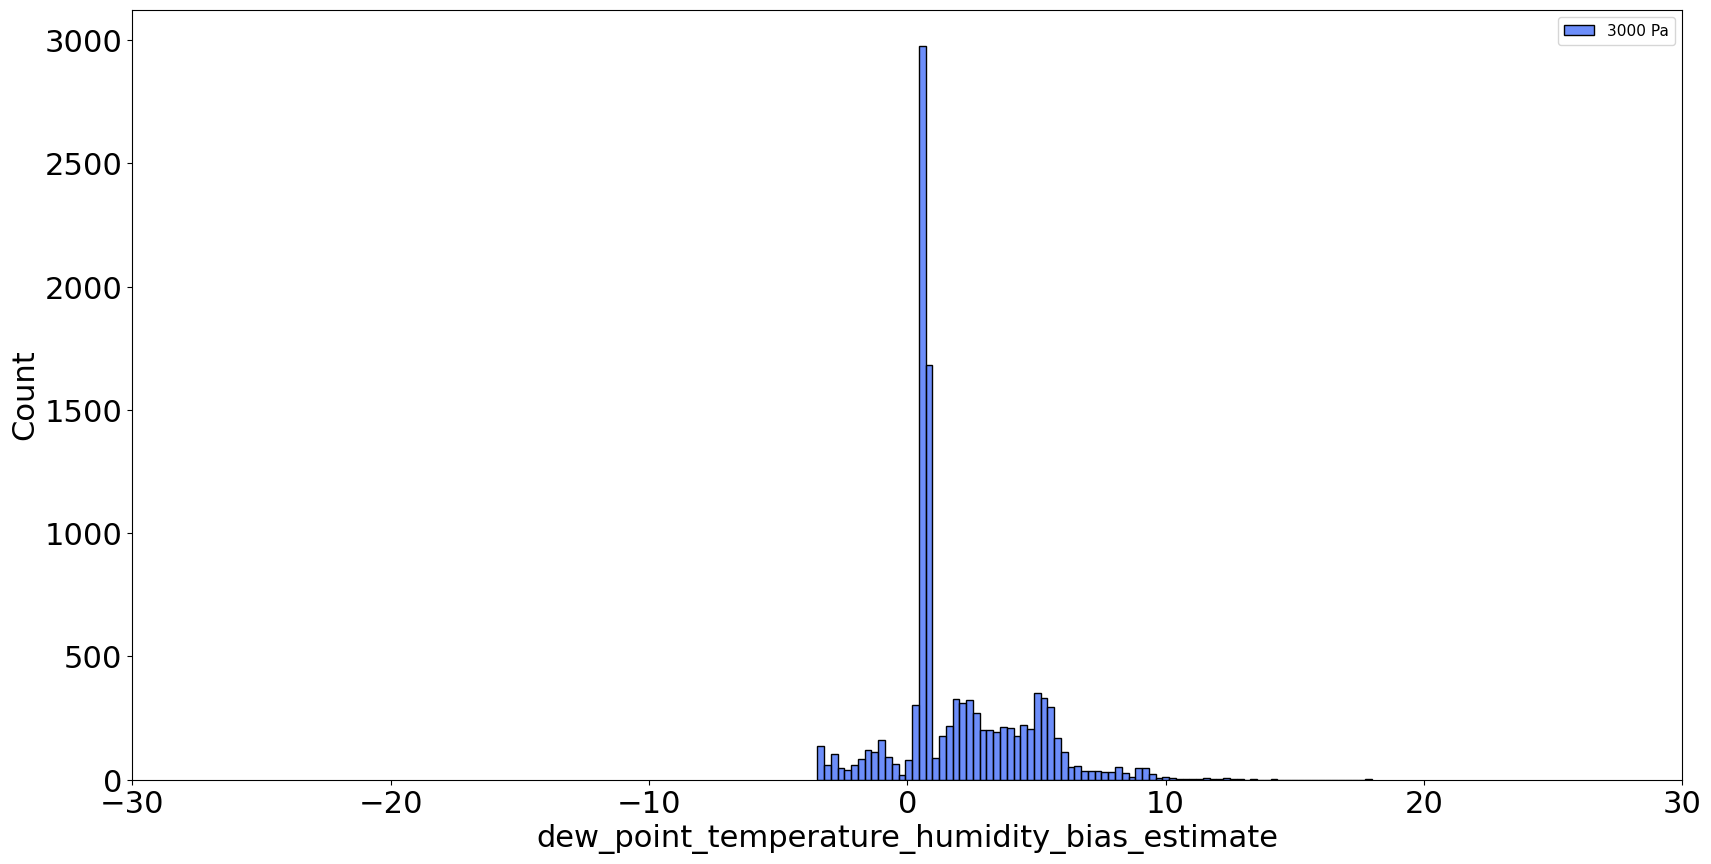

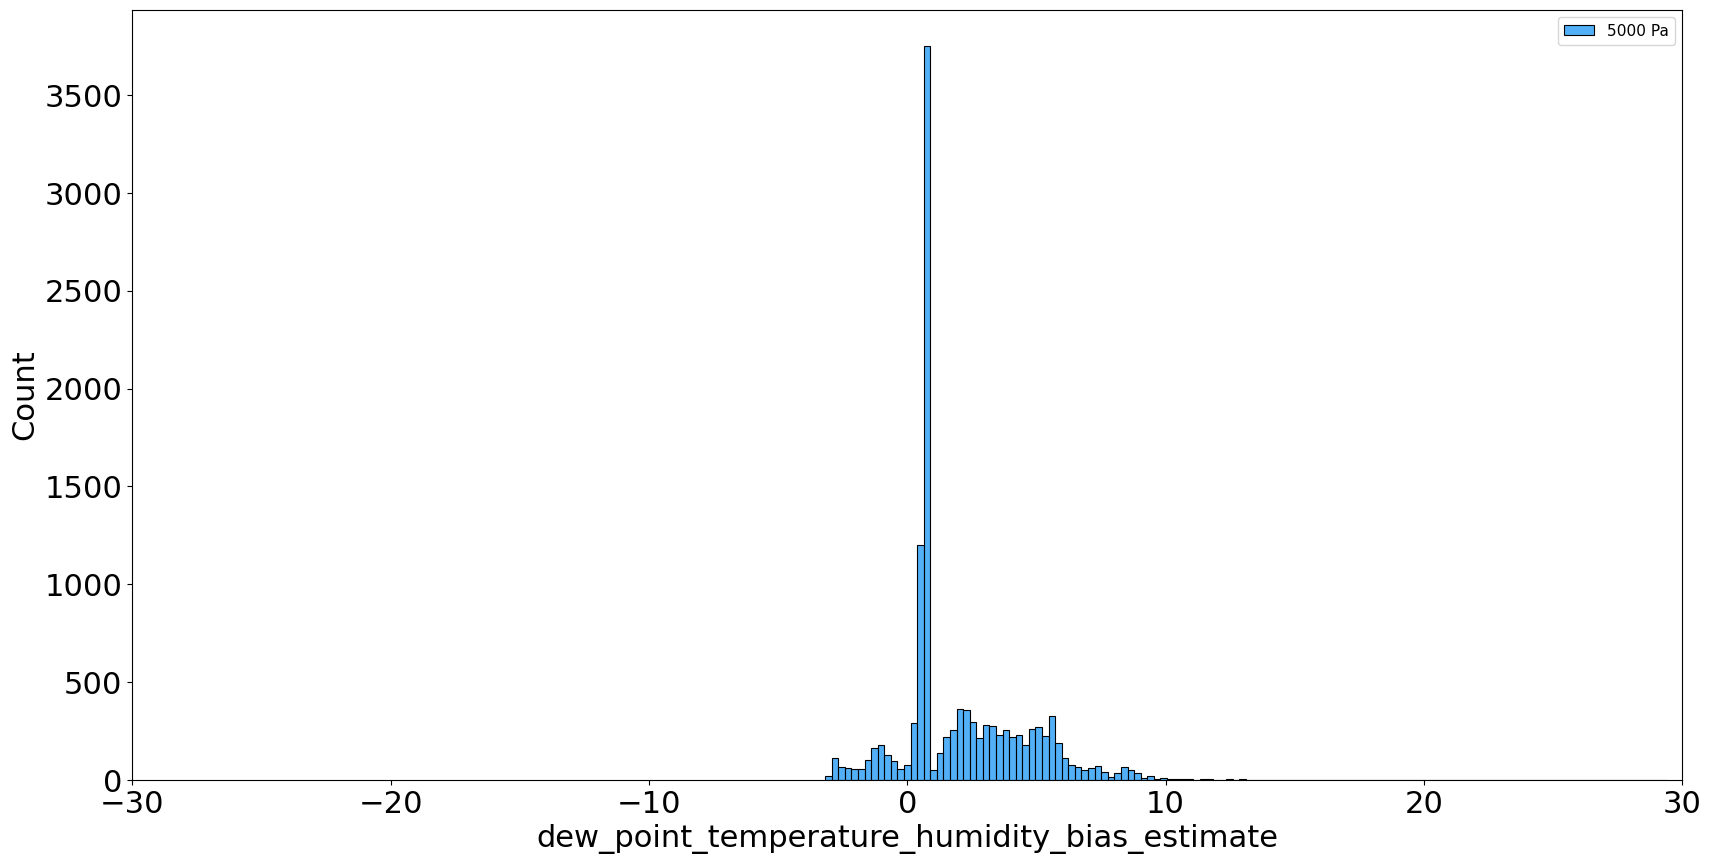

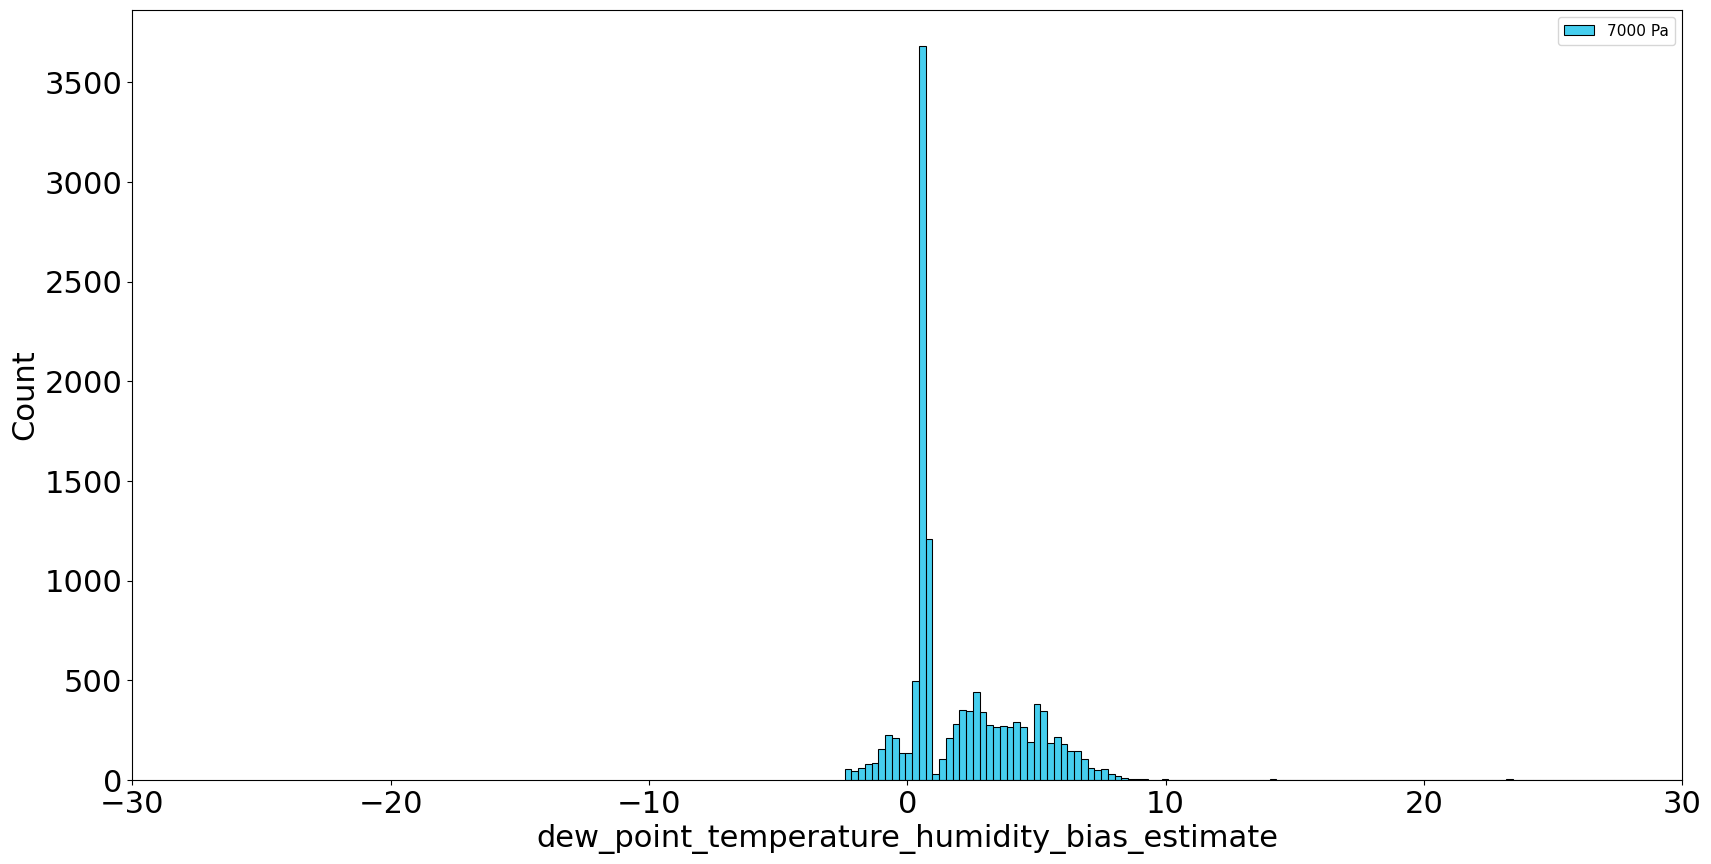

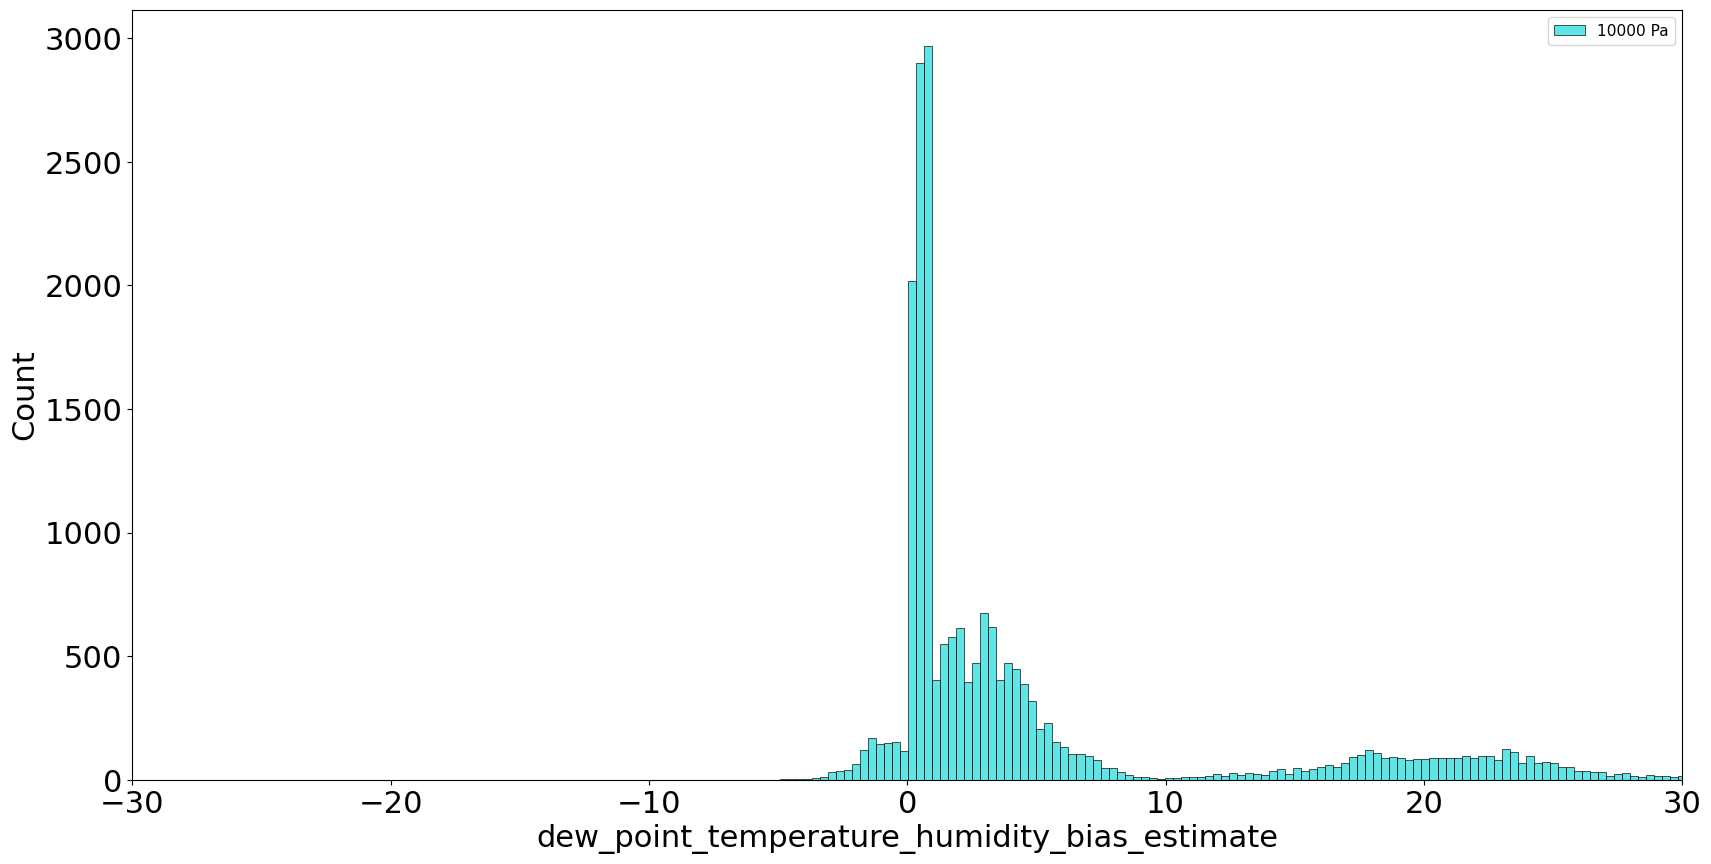

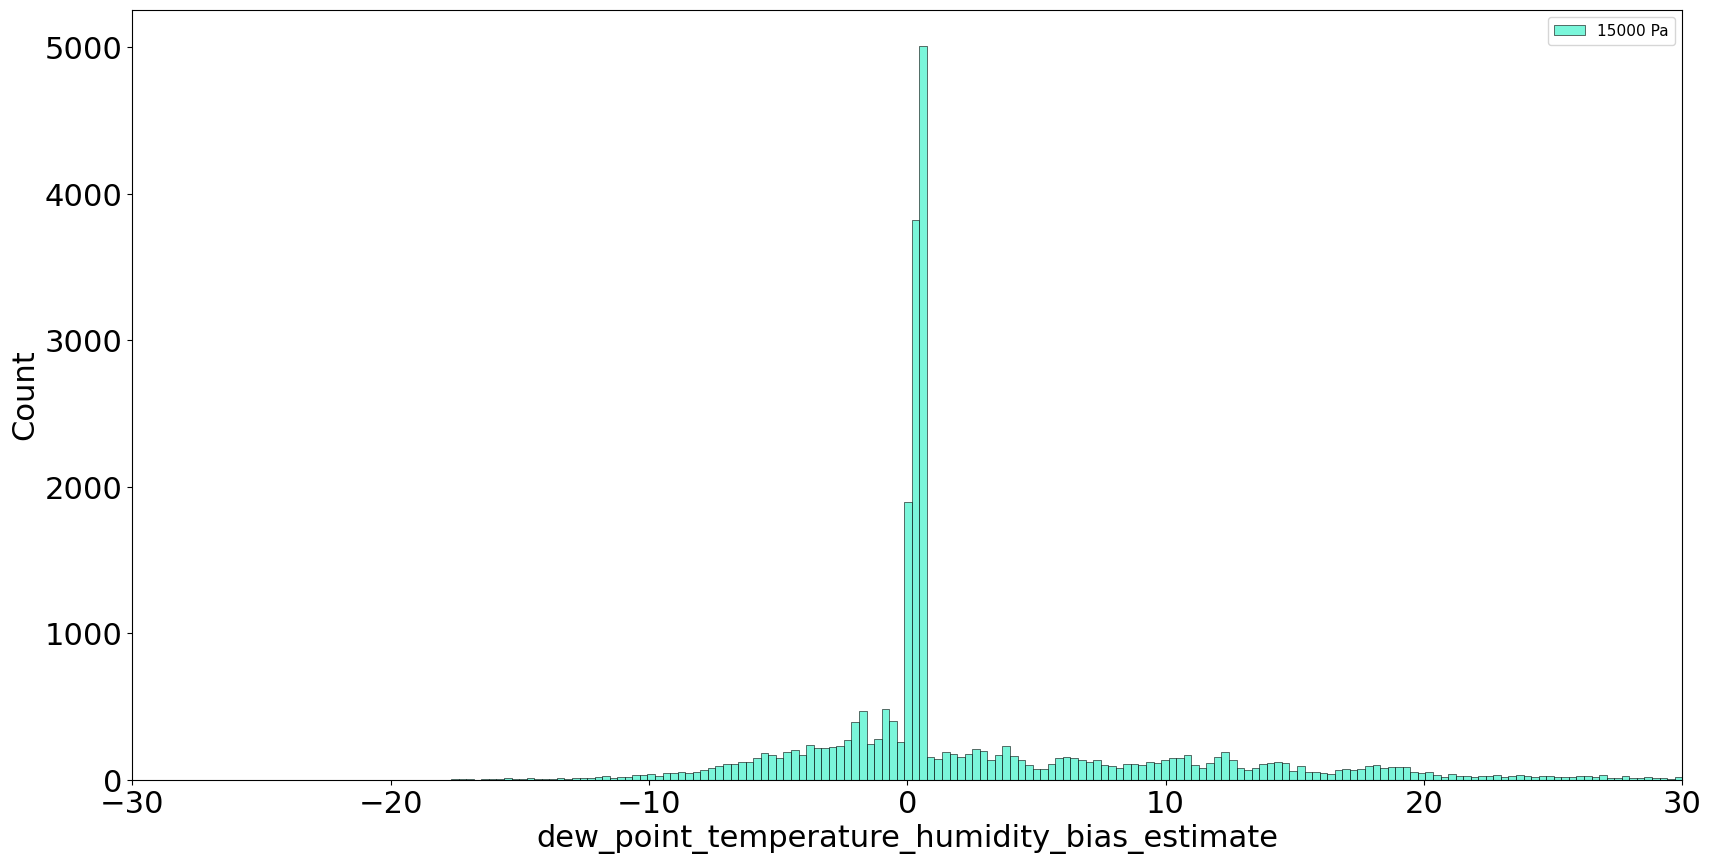

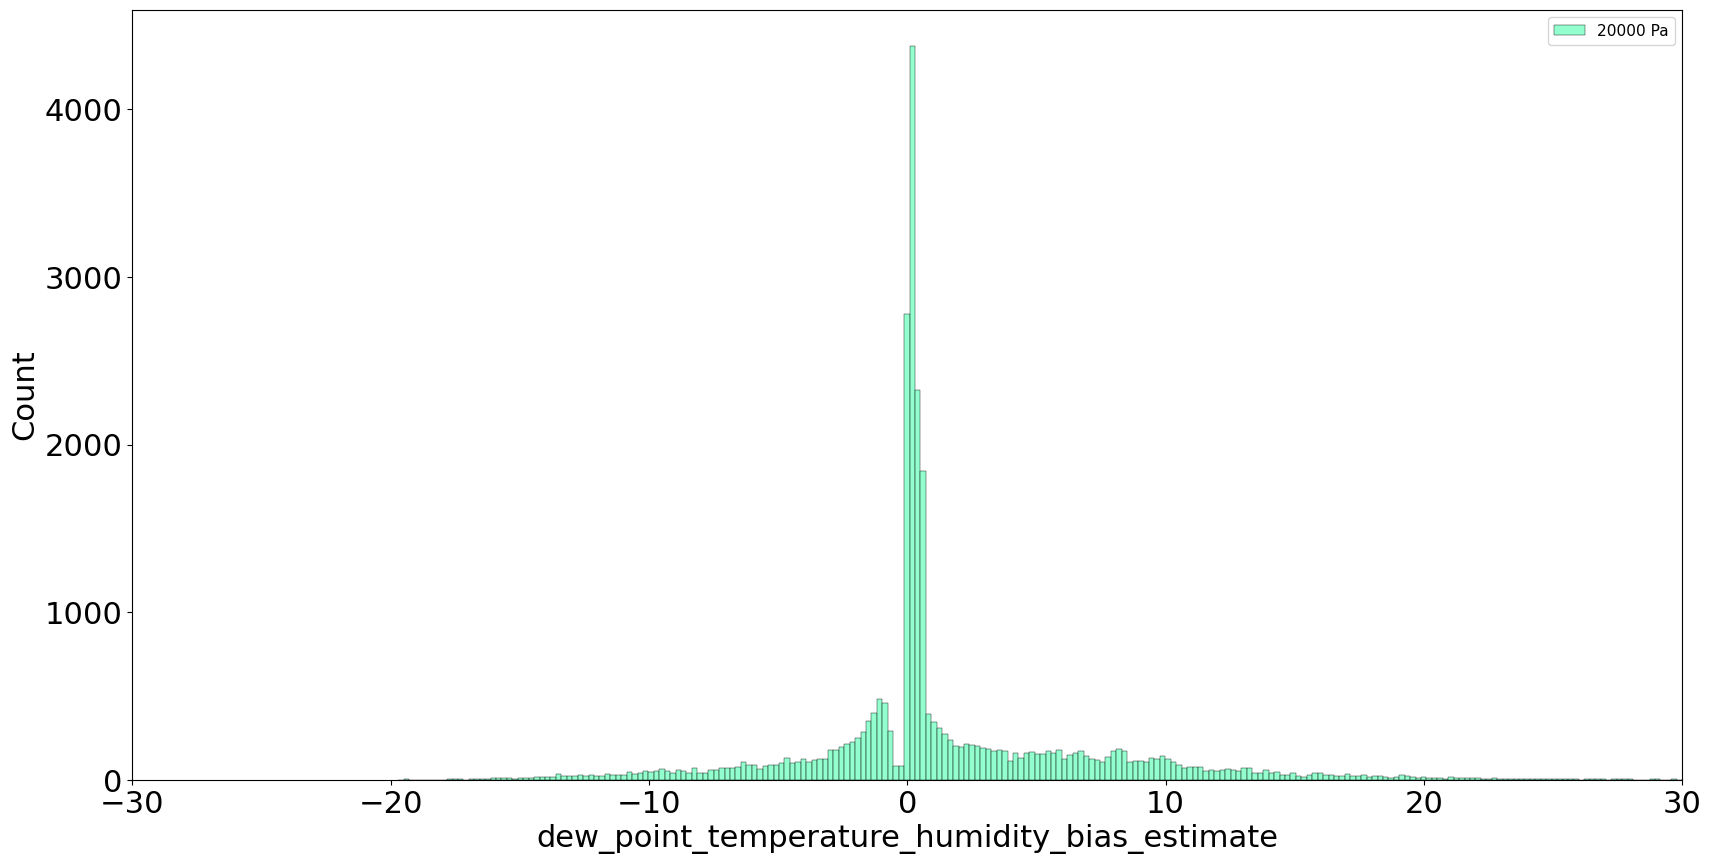

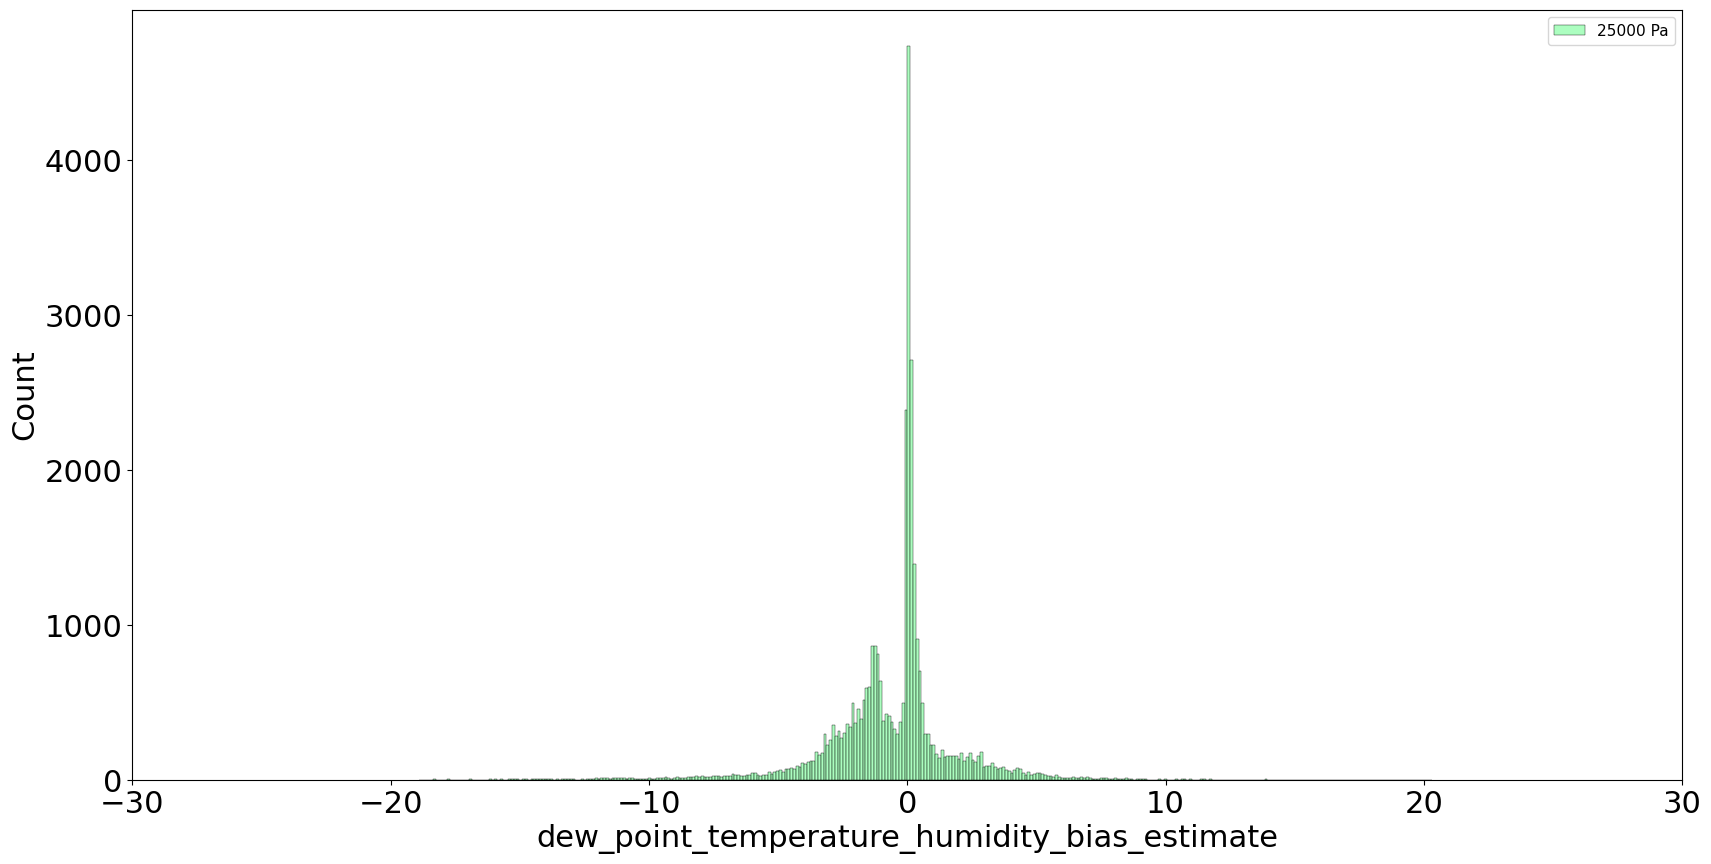

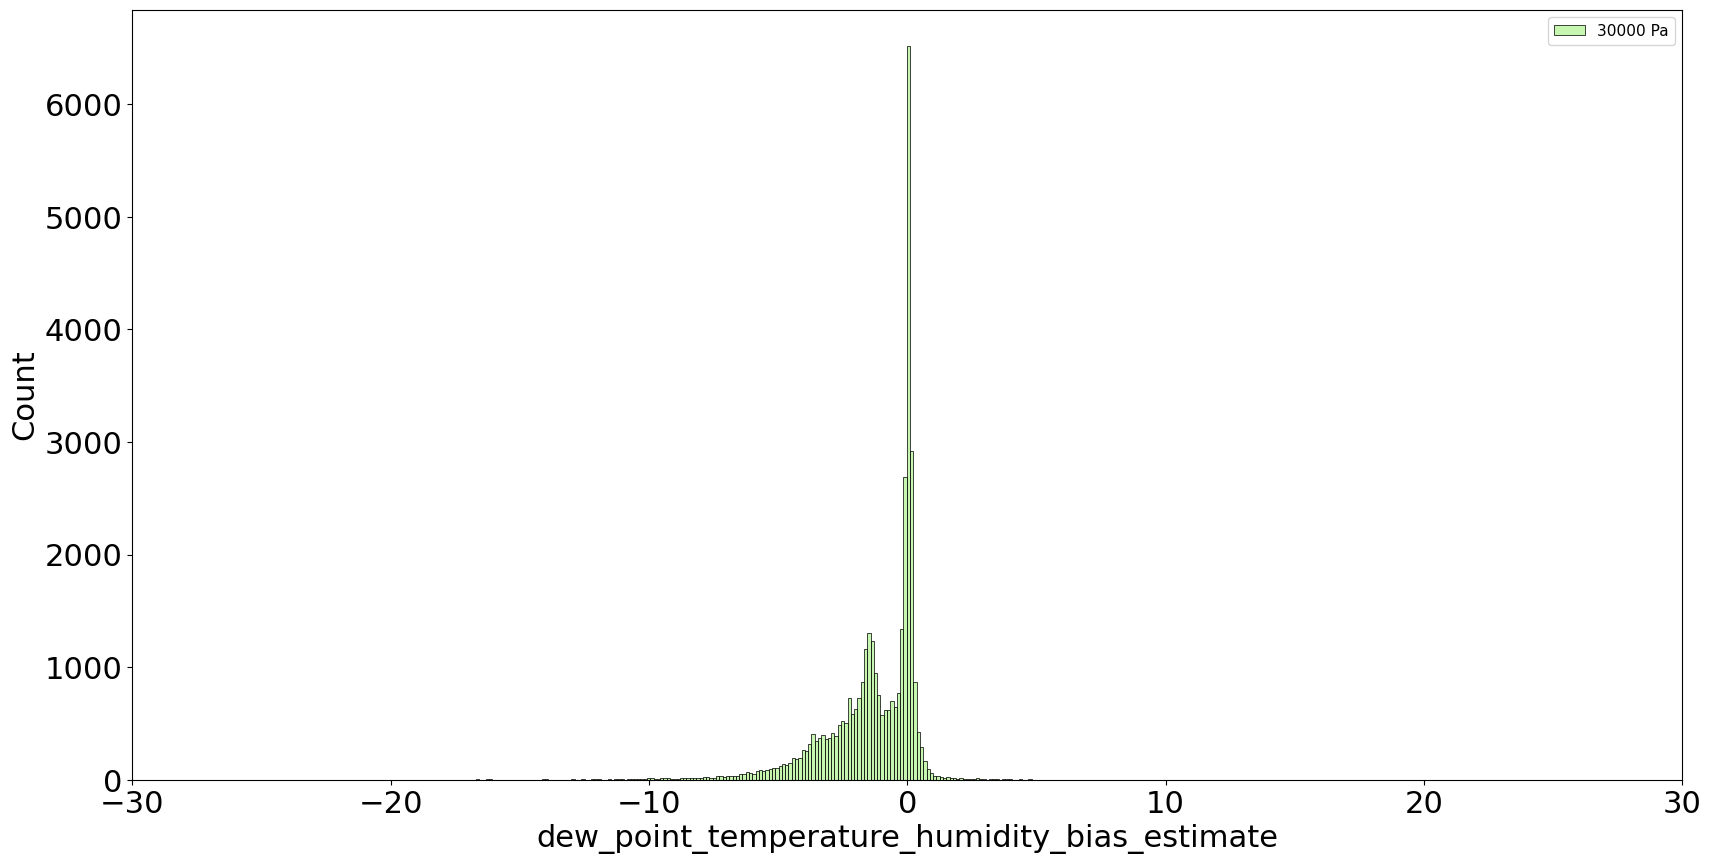

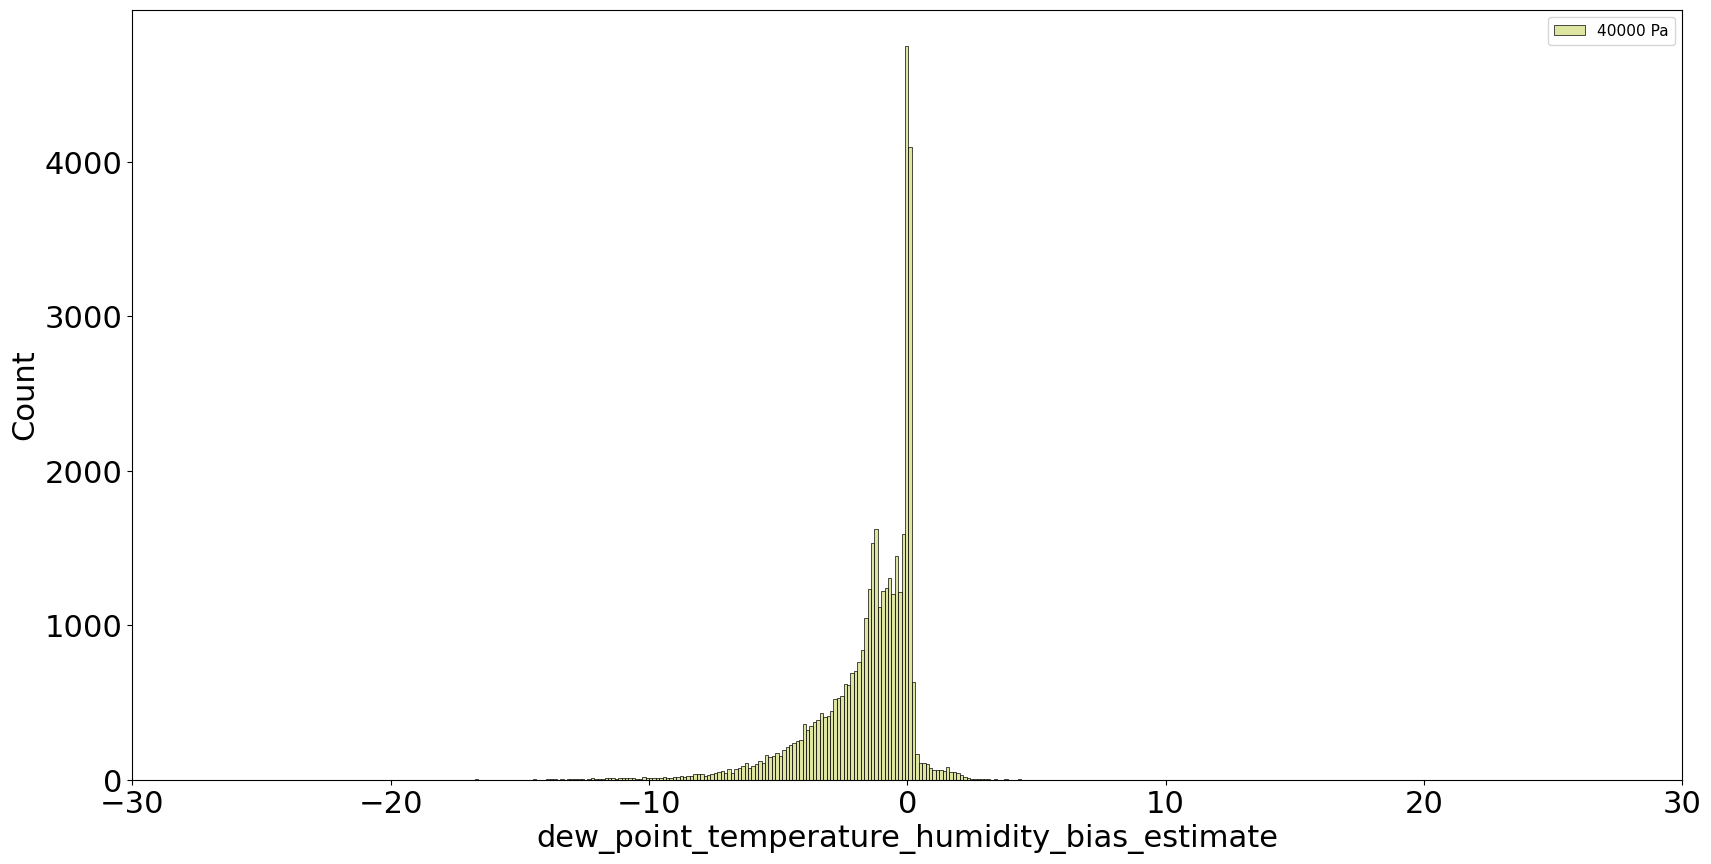

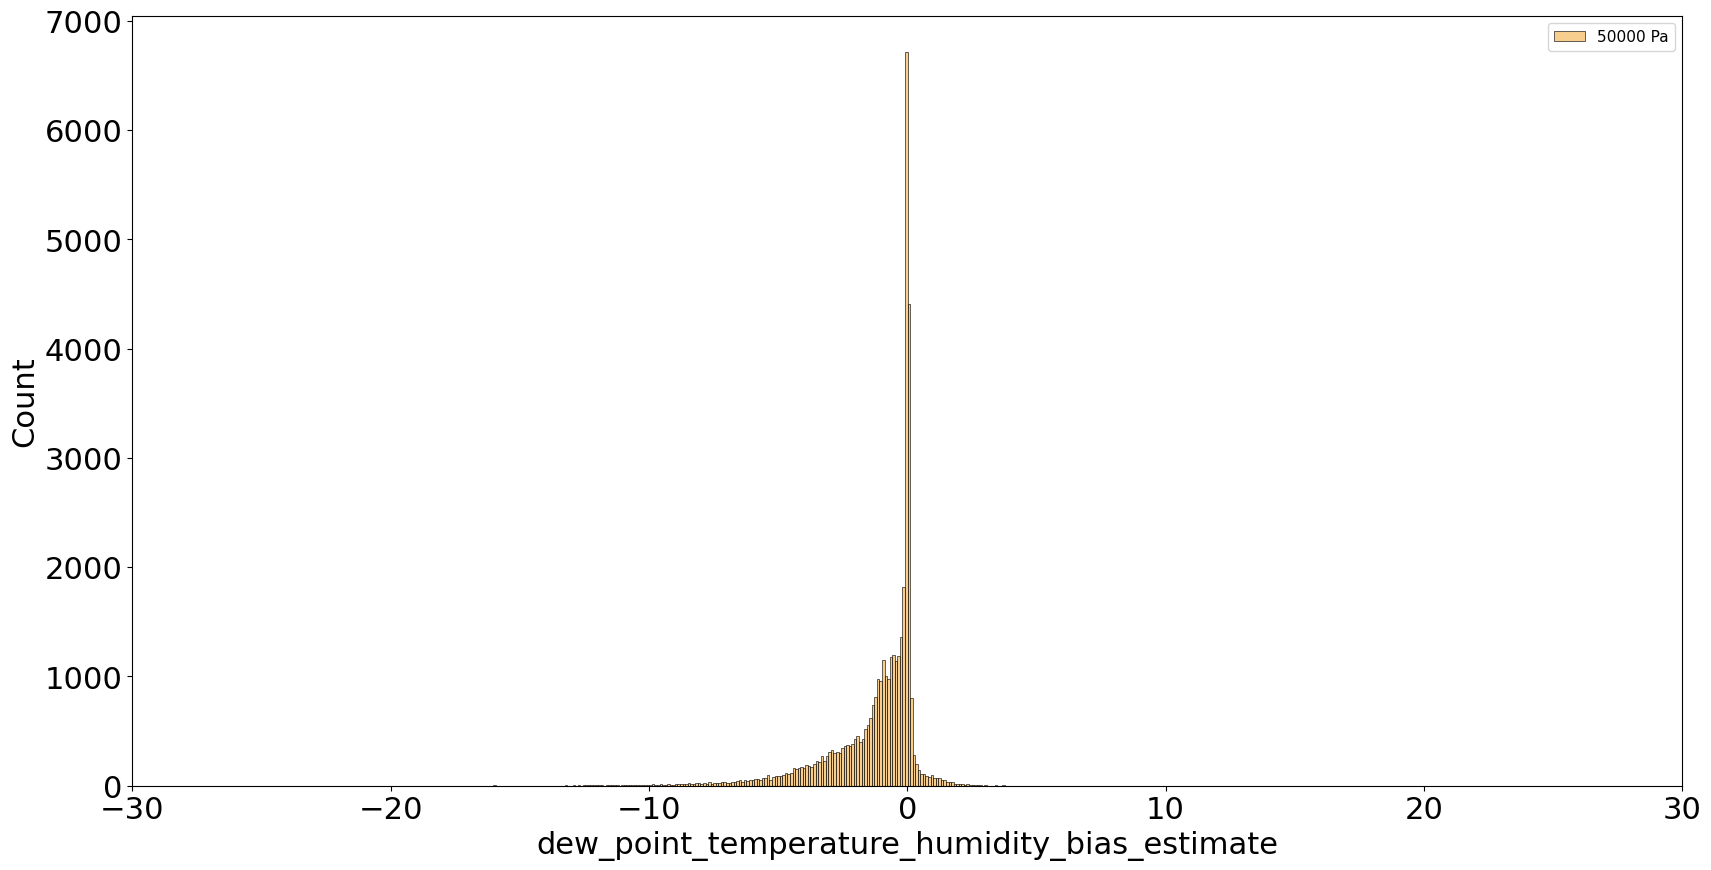

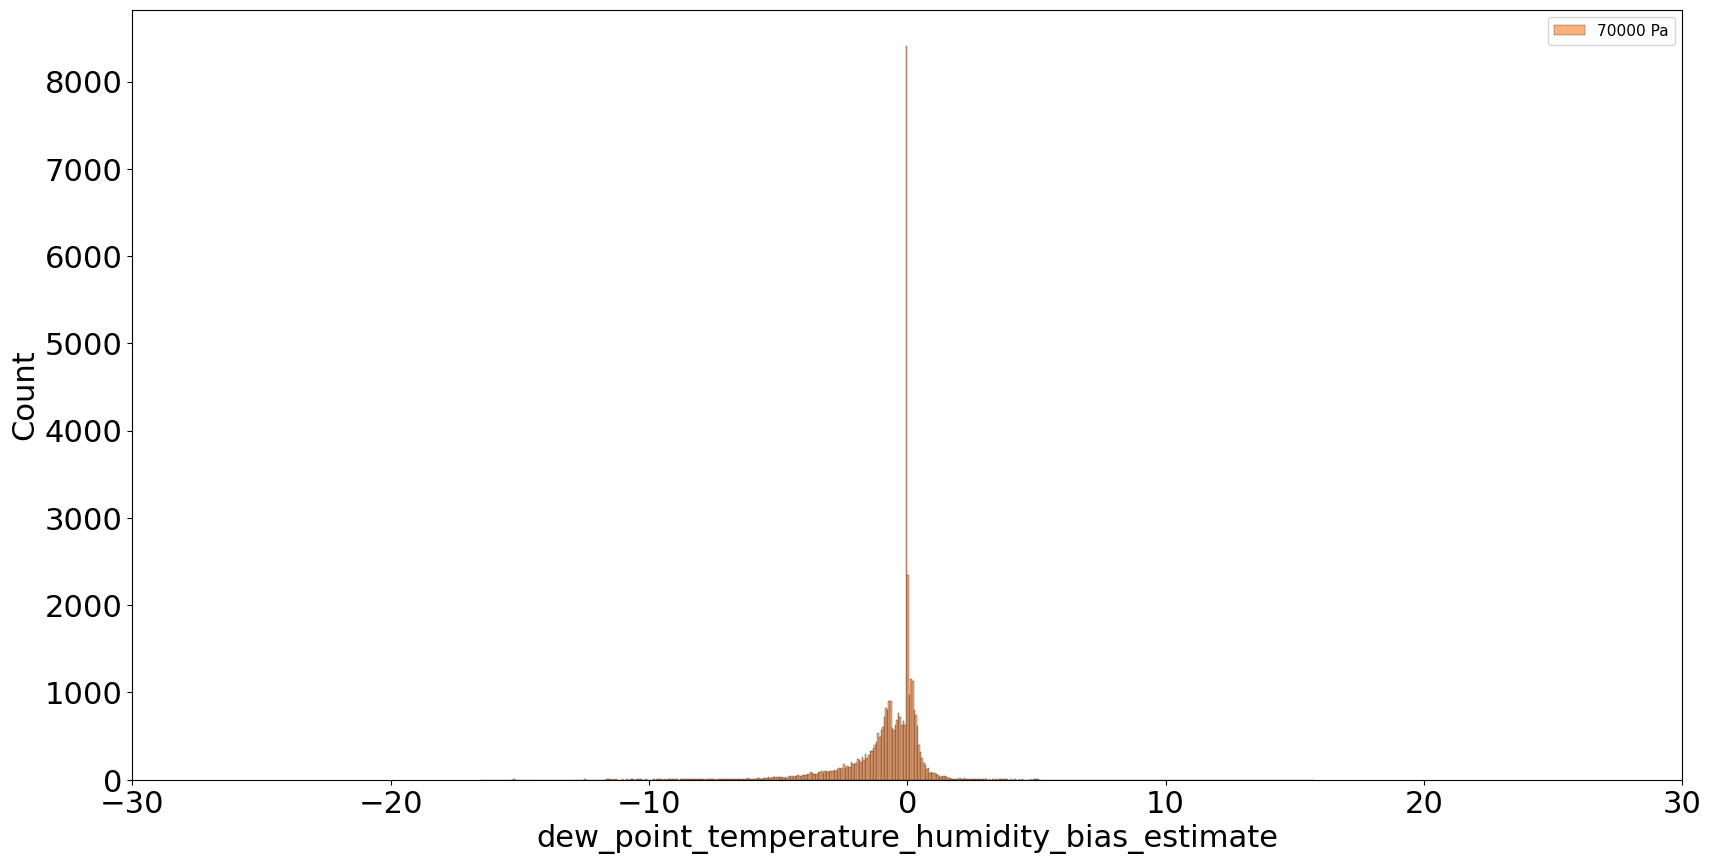

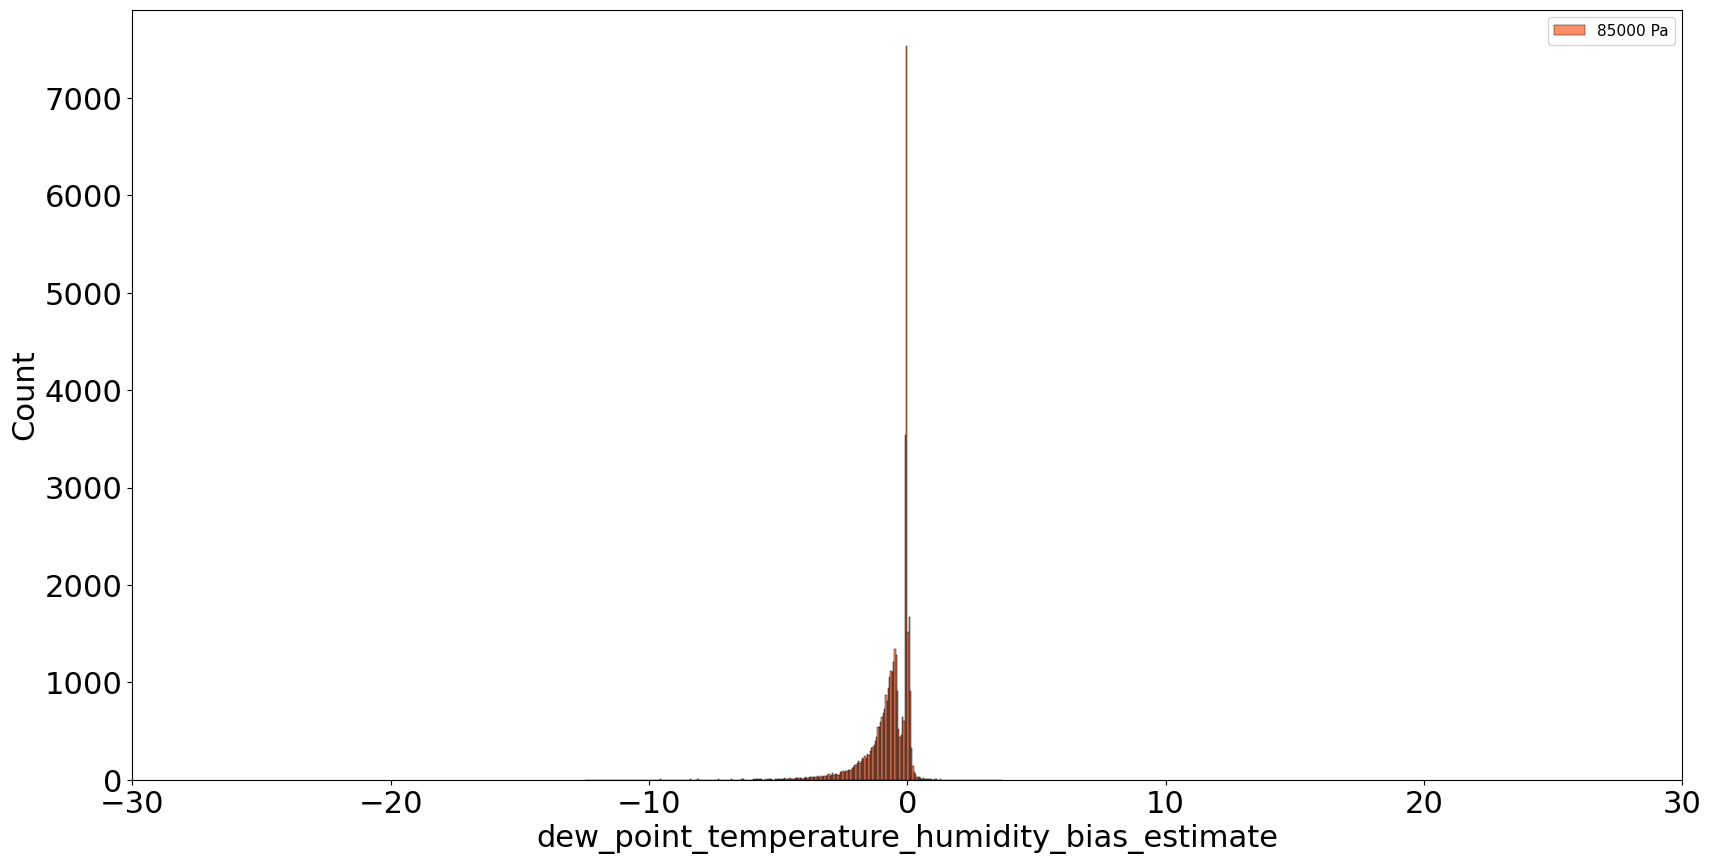

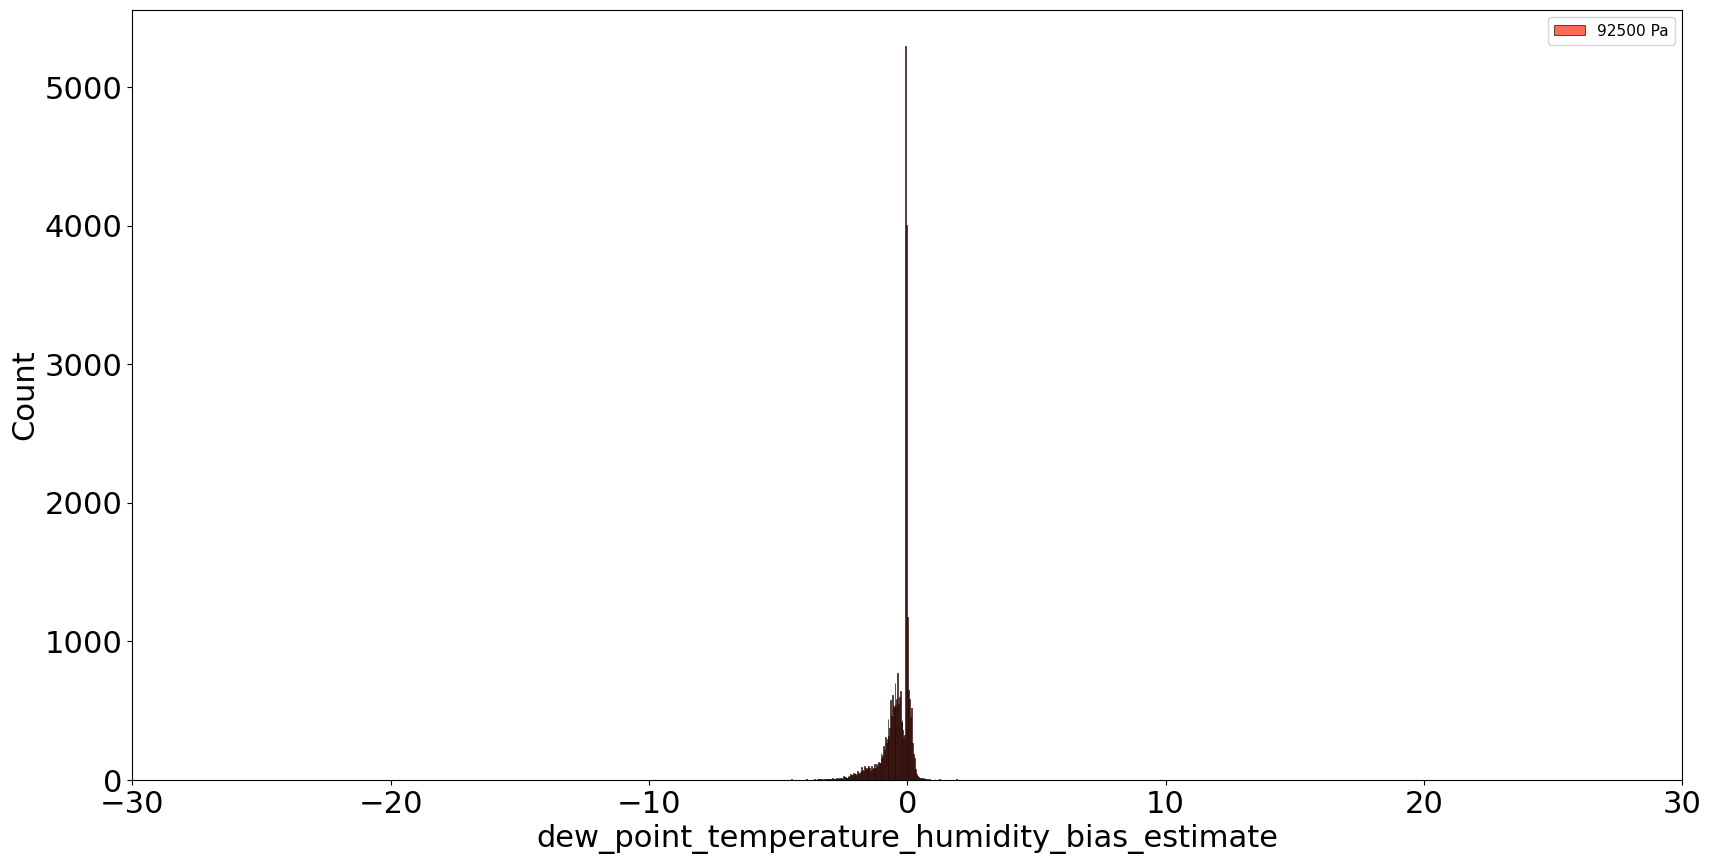

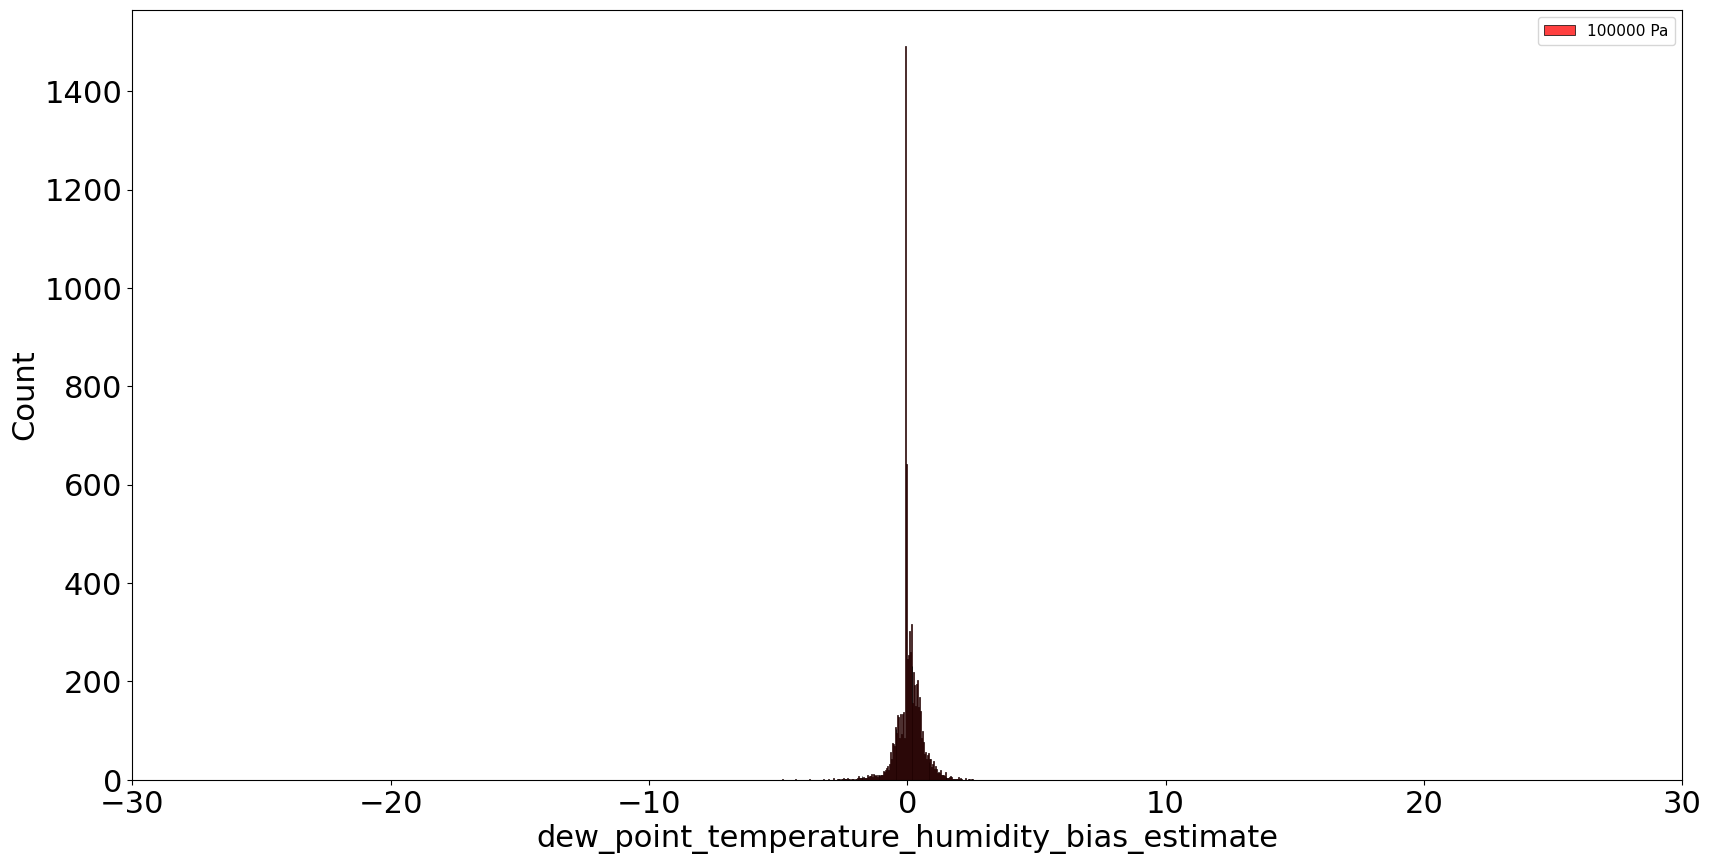

In [41]:
for i in plevs:
    seaborn.histplot(data=df[df.plev == i], x="dew_point_temperature_humidity_bias_estimate", color=plev_color[i], label = str(i) + ' Pa', legend=False)
font = font_manager.FontProperties(size=11)
plt.legend(prop=font)
plt.xlim(-30, 30)
plt.show()
plt.close()

for i in plevs:
    seaborn.histplot(data=df[df.plev == i], x="dew_point_temperature_humidity_bias_estimate", color=plev_color[i], label = str(i) + ' Pa', legend=False)
    font = font_manager.FontProperties(size=11)
    plt.legend(prop=font)
    plt.xlim(-30, 30)
    plt.show()
    plt.close()